# **CAPSTONE PROJECT - MODULE 3**
*Oktandre Boy - JCDS 0408 - 004*

In [78]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import normaltest
from scipy.stats import pearsonr

from sklearn.preprocessing import LabelEncoder




In [79]:
df = pd.read_csv("data_daegu_apartment.csv")
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


# **Studi Kasus data Daegu apartment terhadap harga sewa dengan penerapan *Machine Learning*.**

---
## **1. BUSINESS UNDERSTANDING**
---

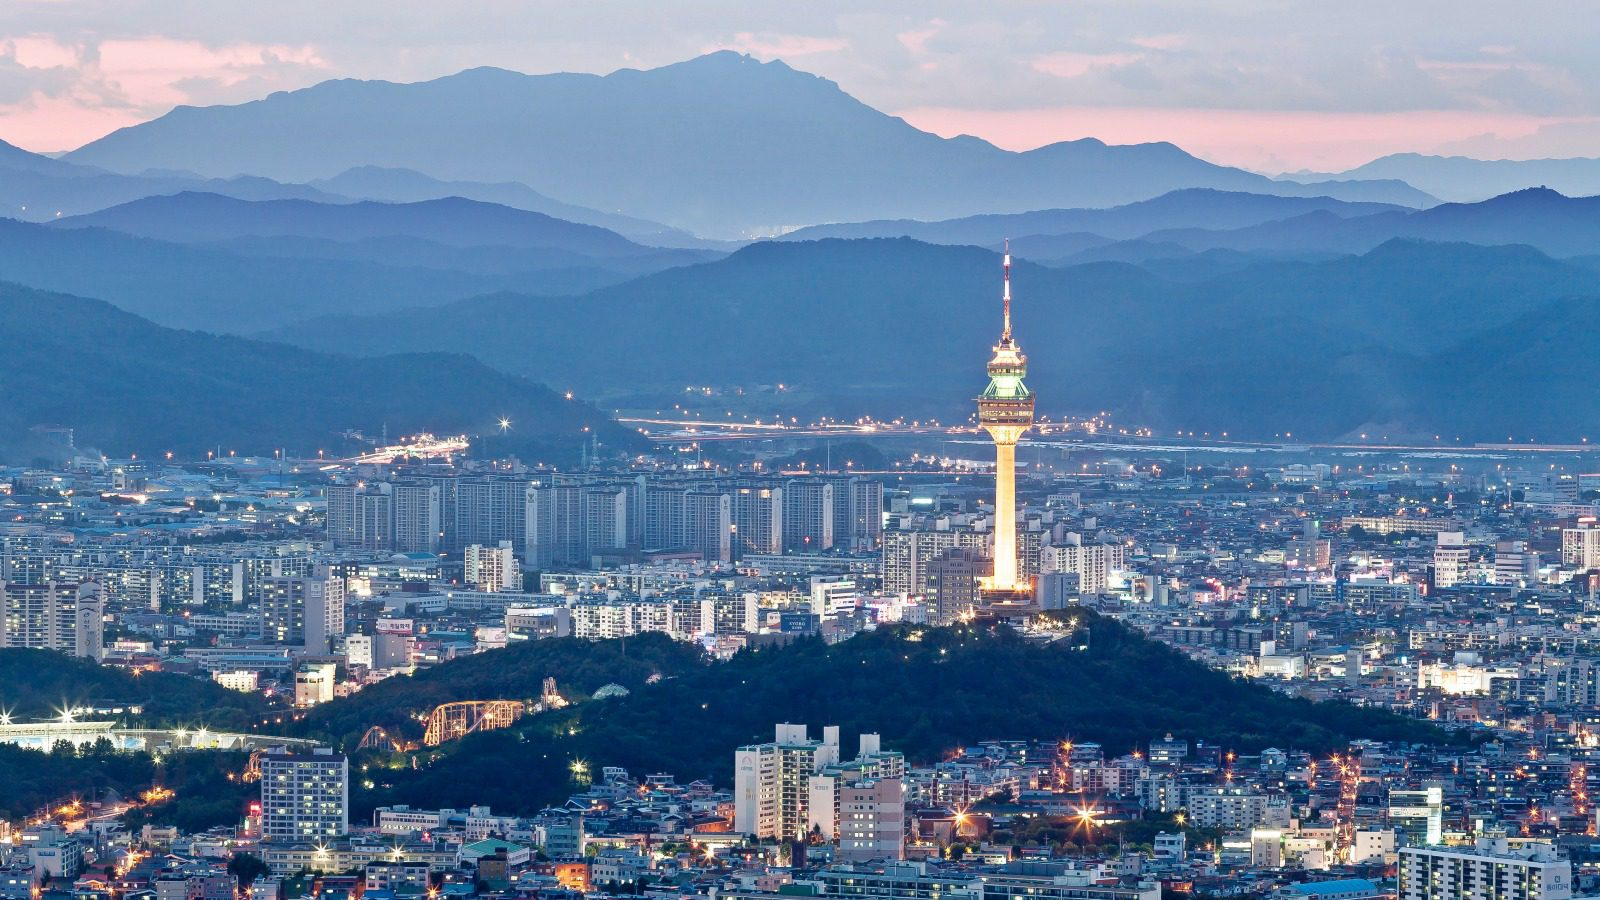

*Daegu city Skyline source: https://facts.net/*

### **Konteks**

Apartemen menjadi salah satu jawaban atas kebutuhan perumahan masyarakat modern karena keterbatasan lahan hunian dan padatnya aktivitas bisnis di kawasan perkotaan. Oleh karena itu, sangat menarik untuk mengkaji harga apartemen yang dipengaruhi oleh berbagai faktor internal dan eksternal.

Individu atau perusahaan biasanya membuat penawaran unit apartemen. Pihak yang menawarkan dapat menjual unit di platform dengan menentukan harga apartemen mereka. Cara tersebut cukup sulit bagi pemilik apartemen untuk menyesuaikan harga dengan harga pasar. Jika harga terlalu tinggi dibandingkan dengan harga pasar, tentu akan sulit untuk melakukan penjualan. Sebaliknya, jika terlalu rendah, pemilik akan kesulitan mendapatkan keuntungan maksimal.








### **Problem Statement & Goals**

Daegu merupakan salah satu kota terbesar dan termasuk kota metropolitan yang ada di Korea Selatan, bahkan menjadi kota ke-4 yang meiliki populasi tertinggi setelah Seoul, Busan, dan Incheon, dengan jumlah populasi sebesar 2,5 juta jiwa atau sebesar 4% dari total 51,7 juta jiwa penduduk Korea Selatan (source : Wikipedia). Dengan populasi yang tinggi, kebutuhan masyarakat kota Daegu akan hunian dalam hal ini apartement juga menjadi cukup tinggi, baik itu untuk dimiliki atau untuk disewa.

* *Problem Statement*

1. *Stakeholder* → Agen Properti / Pengembang kepada calon *customer* / pembeli.

2. *Problem* → Agen properti memiliki kesulitan dalam menentukan harga penjualan setiap unit. Penentuan harga berdasarkan tahun dan luas unit, akses serta lokasi strategis terhadap fasilitas kota, area kampus dan perkantoran.

3. *Problem Solving* → Penentuan harga jual yang kurang tepat akan menyebabkan kerugian kepada perusahaan dikarenakan unit tidak laku terjual konsumen tidak tertarik untuk membeli unit.




* *Goals*

1. Analisa dan identifikasi faktor-faktor apa saja yang mempengaruhi harga penjualan apartemen serta memberikan *insight* kepada *stakeholder* terkait penjualan di bidang *real estate*.

2. Analisa terukur dengan pemodelan prediktif Mean Absolute Error (MAE) sebagai acuan untuk akurasi harga yang akan dijadikan prediksi penjualan.



### **Analytic Approach**

Hal pertama yang perlu dilakukan adalah menganalisis data yang tersedia dari sejumlah apartemen untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu apartemen dengan yang lainnya.

Kemudian akan dibangun suatu model regresi yang akan membantu calon pembeli/penyewa dan penjual/penyedia untuk dapat menyediakan 'tool' prediksi harga dari sebuah apartement yang mana akan berguna untuk keperluan transaksi nantinya.

### **Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan.

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

---
## **2. DATA UNDERSTANDING**
---

### **2.1 EDA (Exploratory Data Analysis)**

In [80]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 120)

df = pd.read_csv('data_daegu_apartment.csv')

# show data description
print(f"Jumlah Baris,Kolom : {df.shape}")
cols =['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice']

pd.DataFrame({
    'column': cols,
    'data_type': df[cols].dtypes.values,
    'min': [df[col].min() if df[col].dtype == 'int64' or df[col].dtype == 'float64' else None for col in cols],
    'mean': [df[col].mean().round(2) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else None for col in cols],
    'median': [df[col].median() if df[col].dtype == 'int64' or df[col].dtype == 'float64' else None for col in cols],
    'max': [df[col].max() if df[col].dtype == 'int64' or df[col].dtype == 'float64' else None for col in cols],
    'n_unique': df[cols].nunique().values,
    'sample_unique': [df[col].unique() for col in cols]}
)

Jumlah Baris,Kolom : (4123, 11)


,column,data_type,min,mean,median,max,n_unique,sample_unique
0,HallwayType,object,NaN,NaN,NaN,NaN,3,"[terraced, mixed, corridor]"
1,TimeToSubway,object,NaN,NaN,NaN,NaN,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,object,NaN,NaN,NaN,NaN,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),float64,0.0,1.93,1.0,5.0,4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0.0,4.14,5.0,7.0,8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),float64,0.0,2.75,2.0,5.0,6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),float64,0.0,568.98,536.0,1321.0,20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76...."
7,YearBuilt,int64,1978.0,2003.00,2006.0,2015.0,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,int64,1.0,5.82,5.0,10.0,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),int64,135.0,954.63,910.0,2337.0,89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, ..."


Dataset diatas merupakan data harga jual apartement di kota Daegu, Korea Selatan, dalam dataset tidak diketahui periode pengambilan datanya, namun berdasarkan tahun / usia bangunan pertama kali didirikan, periode tersebut terambil dari tahun 1978 hingga tahun 2015.

* Penjelasan setiap kolom terdapat pada tabel dibawah:

| No. | Nama Kolom | Type | Penjelasan|
| ----| ---------- | ---------------- | --------------|
|1|HallwayType|Kategorikal|Tipe lorong apartemen|
|2|TimeToSubway|Kategorikal|Waktu tempuh menuju ke *subway* dengan berjalan kaki|
|3|SubwayStation|Kategorikal|Stasiun *subway* terdekat|
|4|N_FacilitiesNearBy(ETC)|Numerikal|Jumlah fasilitas lain yang tersedia (fasilitas hiburan)|
|5|N_FacilitiesNearBy(PublicOffice)|Numerikal|Jumlah fasilitas publik yang tersedia|
|6|N_SchoolNearBy(University)|Numerikal|Jumlah kampus univeristas terdekat|
|7|N_Parkinglot(Basement)|Numerikal|Jumlah tempat parkir bawah tanah (*basement*)|
|8|YearBuilt|Numerikal|Tahun apartemen dibangun|
|9|N_FacilitiesInApt|Numerikal|Jumlah Fasilitas dalam apartemen|
|10|Size(sqf)|Numerikal|Ukuran apartemen dalam satuan kaki persegi (squared feet)|
|11|SalePrice|Numerikal|Harga jual apartemen|


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [82]:
display(df.describe(), df.describe(include='object'))

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


##### *Informasi by Dataset (apartemen dengan harga termurah dan termahal*

In [83]:
apart_termurah = df[df['SalePrice'] == df['SalePrice'].min()]
apart_termahal = df[df['SalePrice'] == df['SalePrice'].max()]

In [84]:
perbandingan_harga_apart = pd.concat([apart_termurah,apart_termahal],axis = 0)
perbandingan_harga_apart.insert(0,'',['Termurah','Termahal'])
perbandingan_harga_apart.set_index('').T

,Termurah,Termahal
HallwayType,corridor,terraced
TimeToSubway,10min~15min,0-5min
SubwayStation,Myung-duk,Kyungbuk_uni_hospital
N_FacilitiesNearBy(ETC),5.0,0.0
N_FacilitiesNearBy(PublicOffice),7.0,3.0
N_SchoolNearBy(University),5.0,2.0
N_Parkinglot(Basement),0.0,1270.0
YearBuilt,1992,2007
N_FacilitiesInApt,3,10
Size(sqf),355,1928


berdasarkan perbandingan harganya, apartemen termurah berada di harga 32.743 Won dengan spesifikasi sebagai berikut:

In [85]:
df[df['SalePrice'] == df['SalePrice'].min()]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
1908,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,32743


sedangkan apartemen termahal berada di harga 585.540 dengan spesifikasi sebagai berikut:

In [86]:
df[df['SalePrice'] == df['SalePrice'].max()]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
2128,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,585840


Bisa diidentifikasi berdasarkan informasi diatas bahwa semakin dekat jarak apartemen dengan fasilitas publik seperti stasiun, office dan rumah sakit, maka semakin tinggi harganya, hal lain yang mempengaruhi meningkatnya harga apartemen adalah fasilitas tambahan seperti basement, dan tentu saja jenis bangunan (bangunan tua atau modern), serta luasan bangunan mempengaruhi harga suatu bangunan.

Faktor diatas akan digunakan sebagai acuan untuk memprediksi harga apartemen di Daegu, selain itu berdasarkan EDA yang telah dilakukan, hal ini bisa dijadikan acuan sebagai penentuan harga apartmen di Korea, yaitu sebagai berikut:

**1. Aspek Bangunan**

pada dataset yang menjadi aspek bangunan adalah kolom:
* HallwayType
* N_Parkinglot(Basement)
* YearBuilt
* N_FacilitiesInApt
* Size(sqf)

aspek ini mencakup kondisi dan luasan bangunan, type serta fasilitas yang diunggulkan dari bangunan tersebut.

**2. Aspek Transportasi**

pada dataset yang menjadi aspek transportasi adalah kolom:
* TimeToSubway
* SubwayStation

aspek ini mencakup jarak tempuh suatu apartemen dengan fasilitas publik yang masyarakat Korea sering gunakan yaitu *subway* (kereta bawah tanah).

**3. Aspek Lingkungan**

pada dataset yang menjadi aspek lingkungan adalah kolom:
* N_SchoolNearBy(University)
* N_FacilitiesNearBy(ETC)
* N_FacilitiesNearBy(PublicOffice)

aspek ini mencakup jarak apartemen terhadap fasilitas publik dan lingkungan sosial seperti distrik komersial / hiburan, rumah sakit, office, dll, hal ini dapat mempengaruhi penduduk kota terhadap tingkat pendapatan dan ekonomi.

### **2.2 Distribusi Data**

pengecekan distribusi data, apahal data pada dataset tersebut merata atau tidak

* Kolom Numerikal

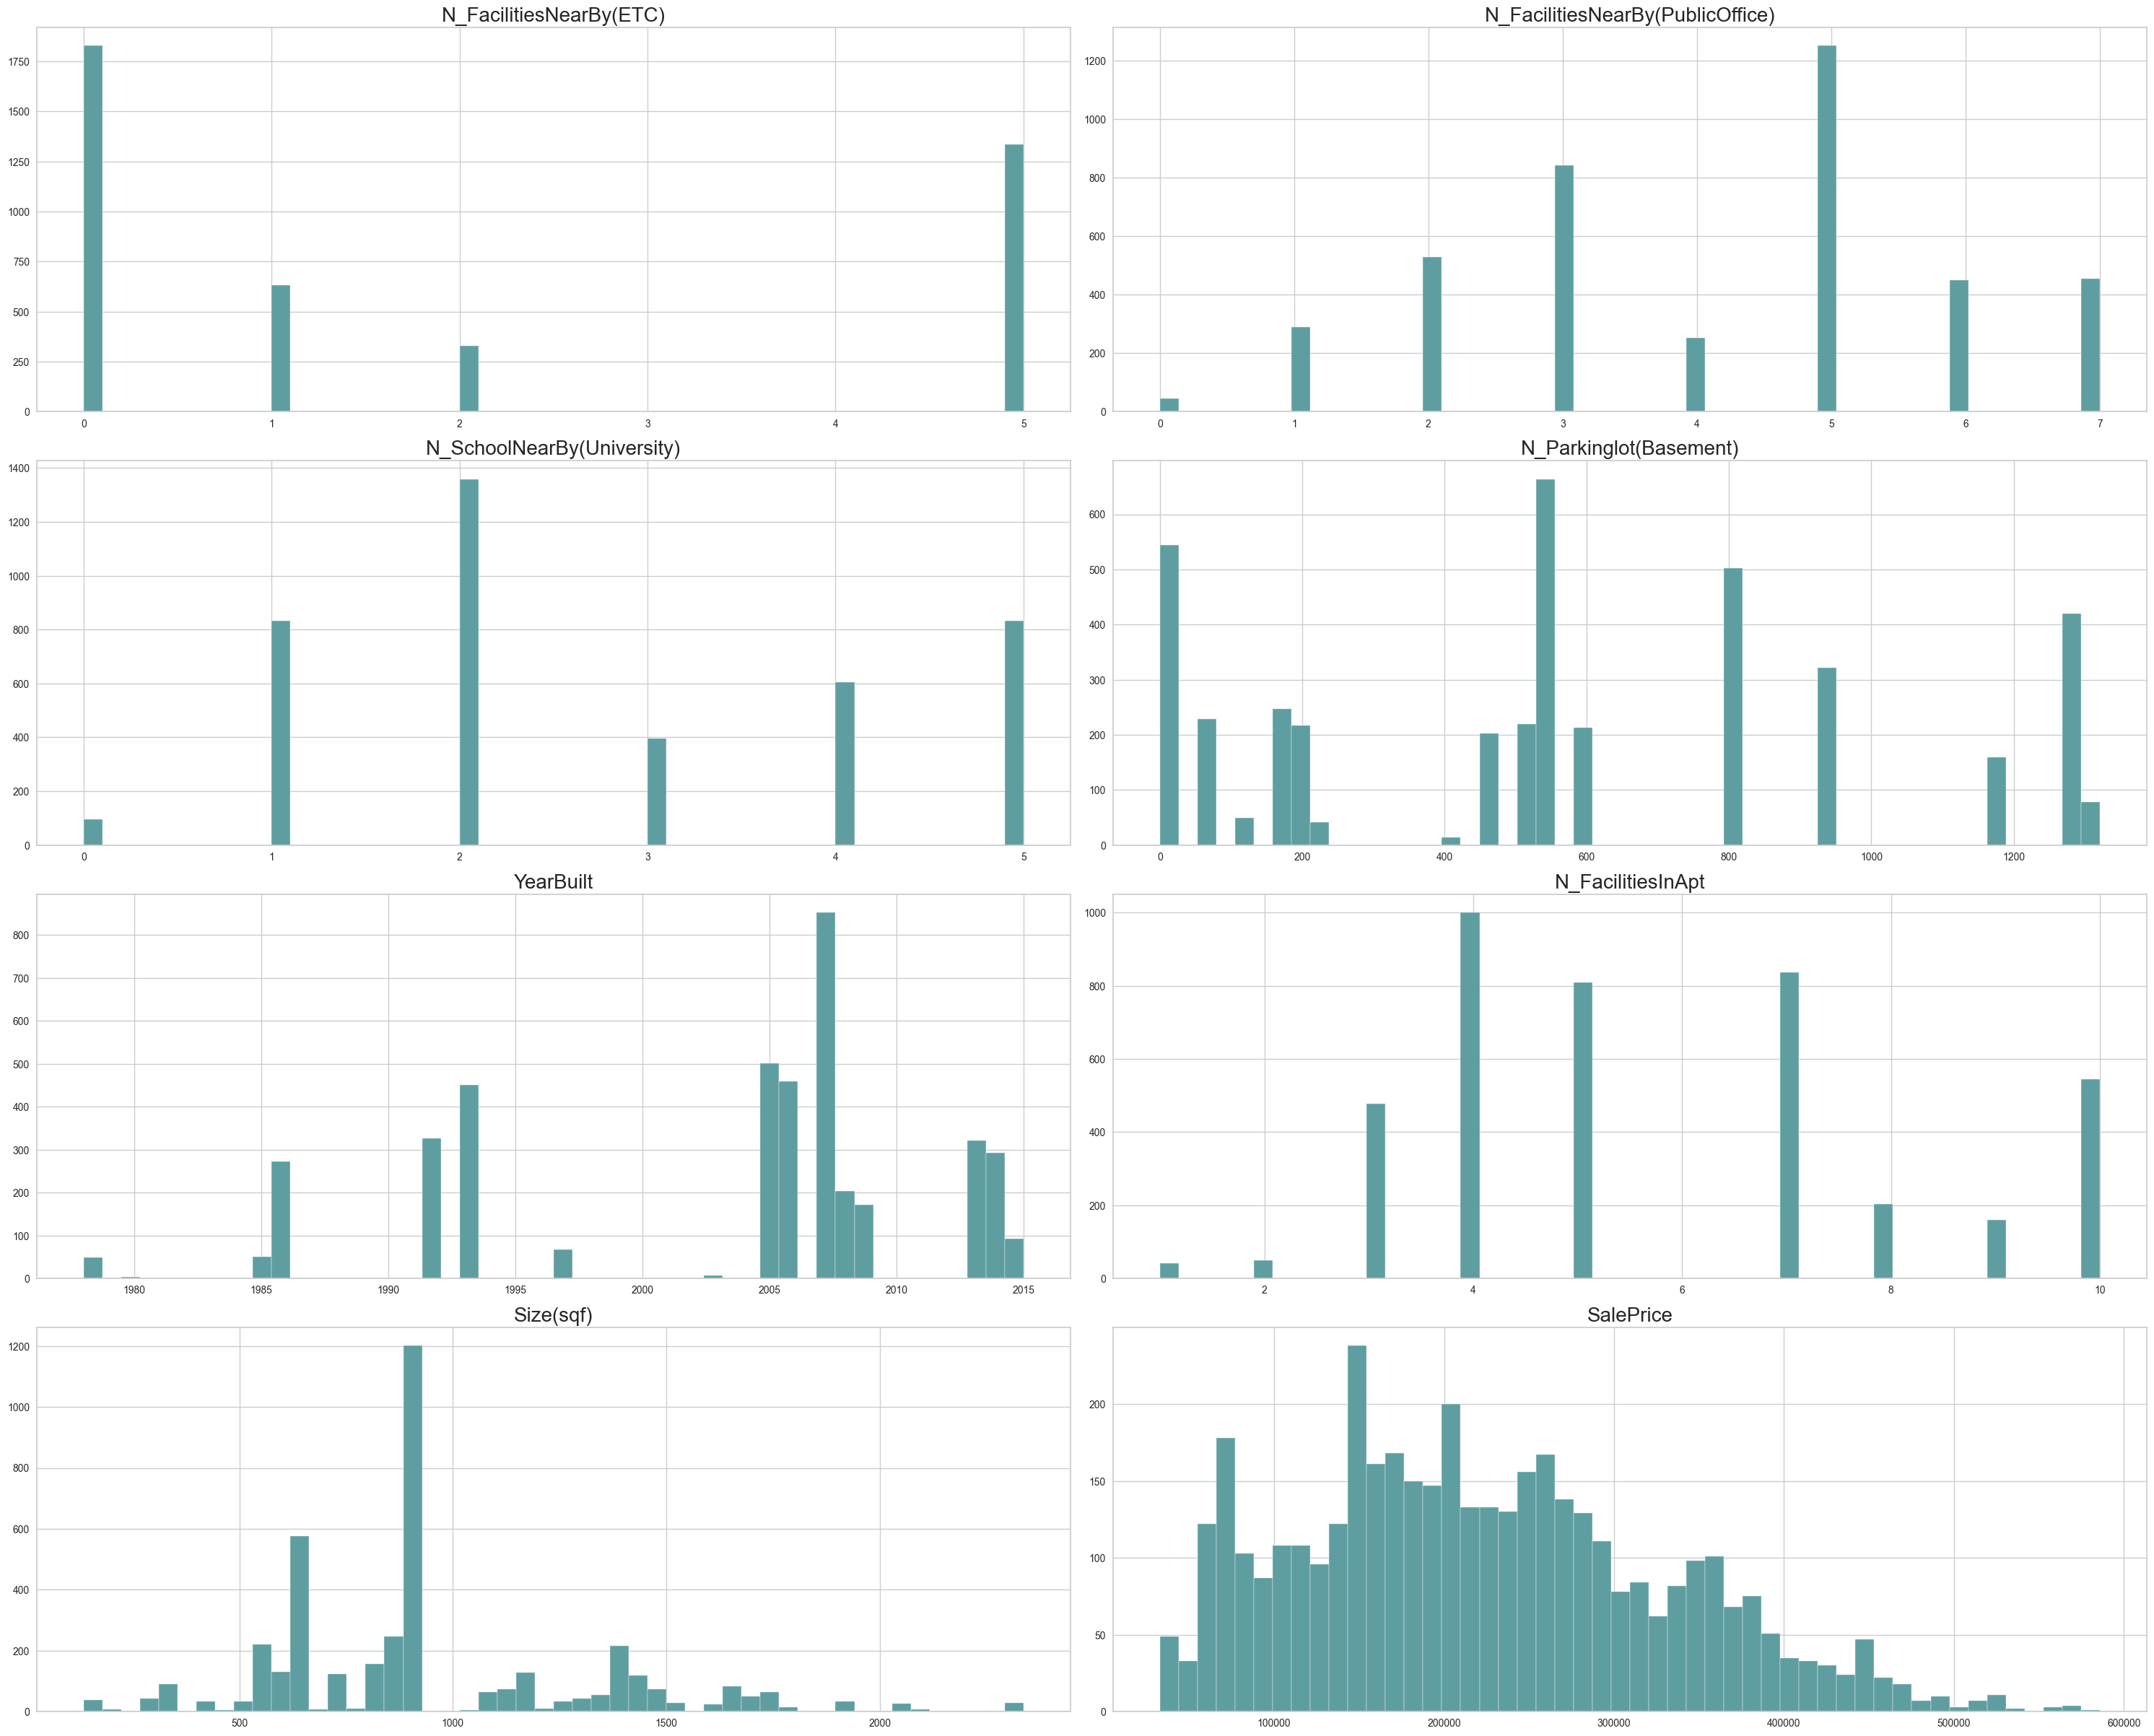

In [87]:
num_cols = len(df.select_dtypes(include=[np.number]).columns)
fig, axes = plt.subplots(num_cols // 2, 2, figsize=(30, 25))

for i, column in enumerate(df.select_dtypes(include=[np.number]).columns):
    # Histogram
    row = i // 2
    col = i % 2 
    axes[row, col].hist(df[column], bins=50, color = "cadetblue", ec="ghostwhite")
    axes[row, col].set_title(column, fontsize=20)


plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


Dilihat dari distribusi datanya dan boxplot-nya, dapat dilihat bahwa:

1. Fitur dengan Distribusi data yang condong ke kiri:
* N_Parkinglot(basement), Size(sqf), SalePrice, N_FacilitiesInApt
2. Fitur dengan Distribusi data yang condong ke kanan:
* YearBuilt, N_SchoolNearBy(University), N_FacilitiesNearBy(PublicOffice)
3. Fitur dengan Distribusi data yang menengah:
* N_FacilitiesNearBy(ETC)

Secara Keseluruhan Data tidak normal.

* Kolom Kategorikal


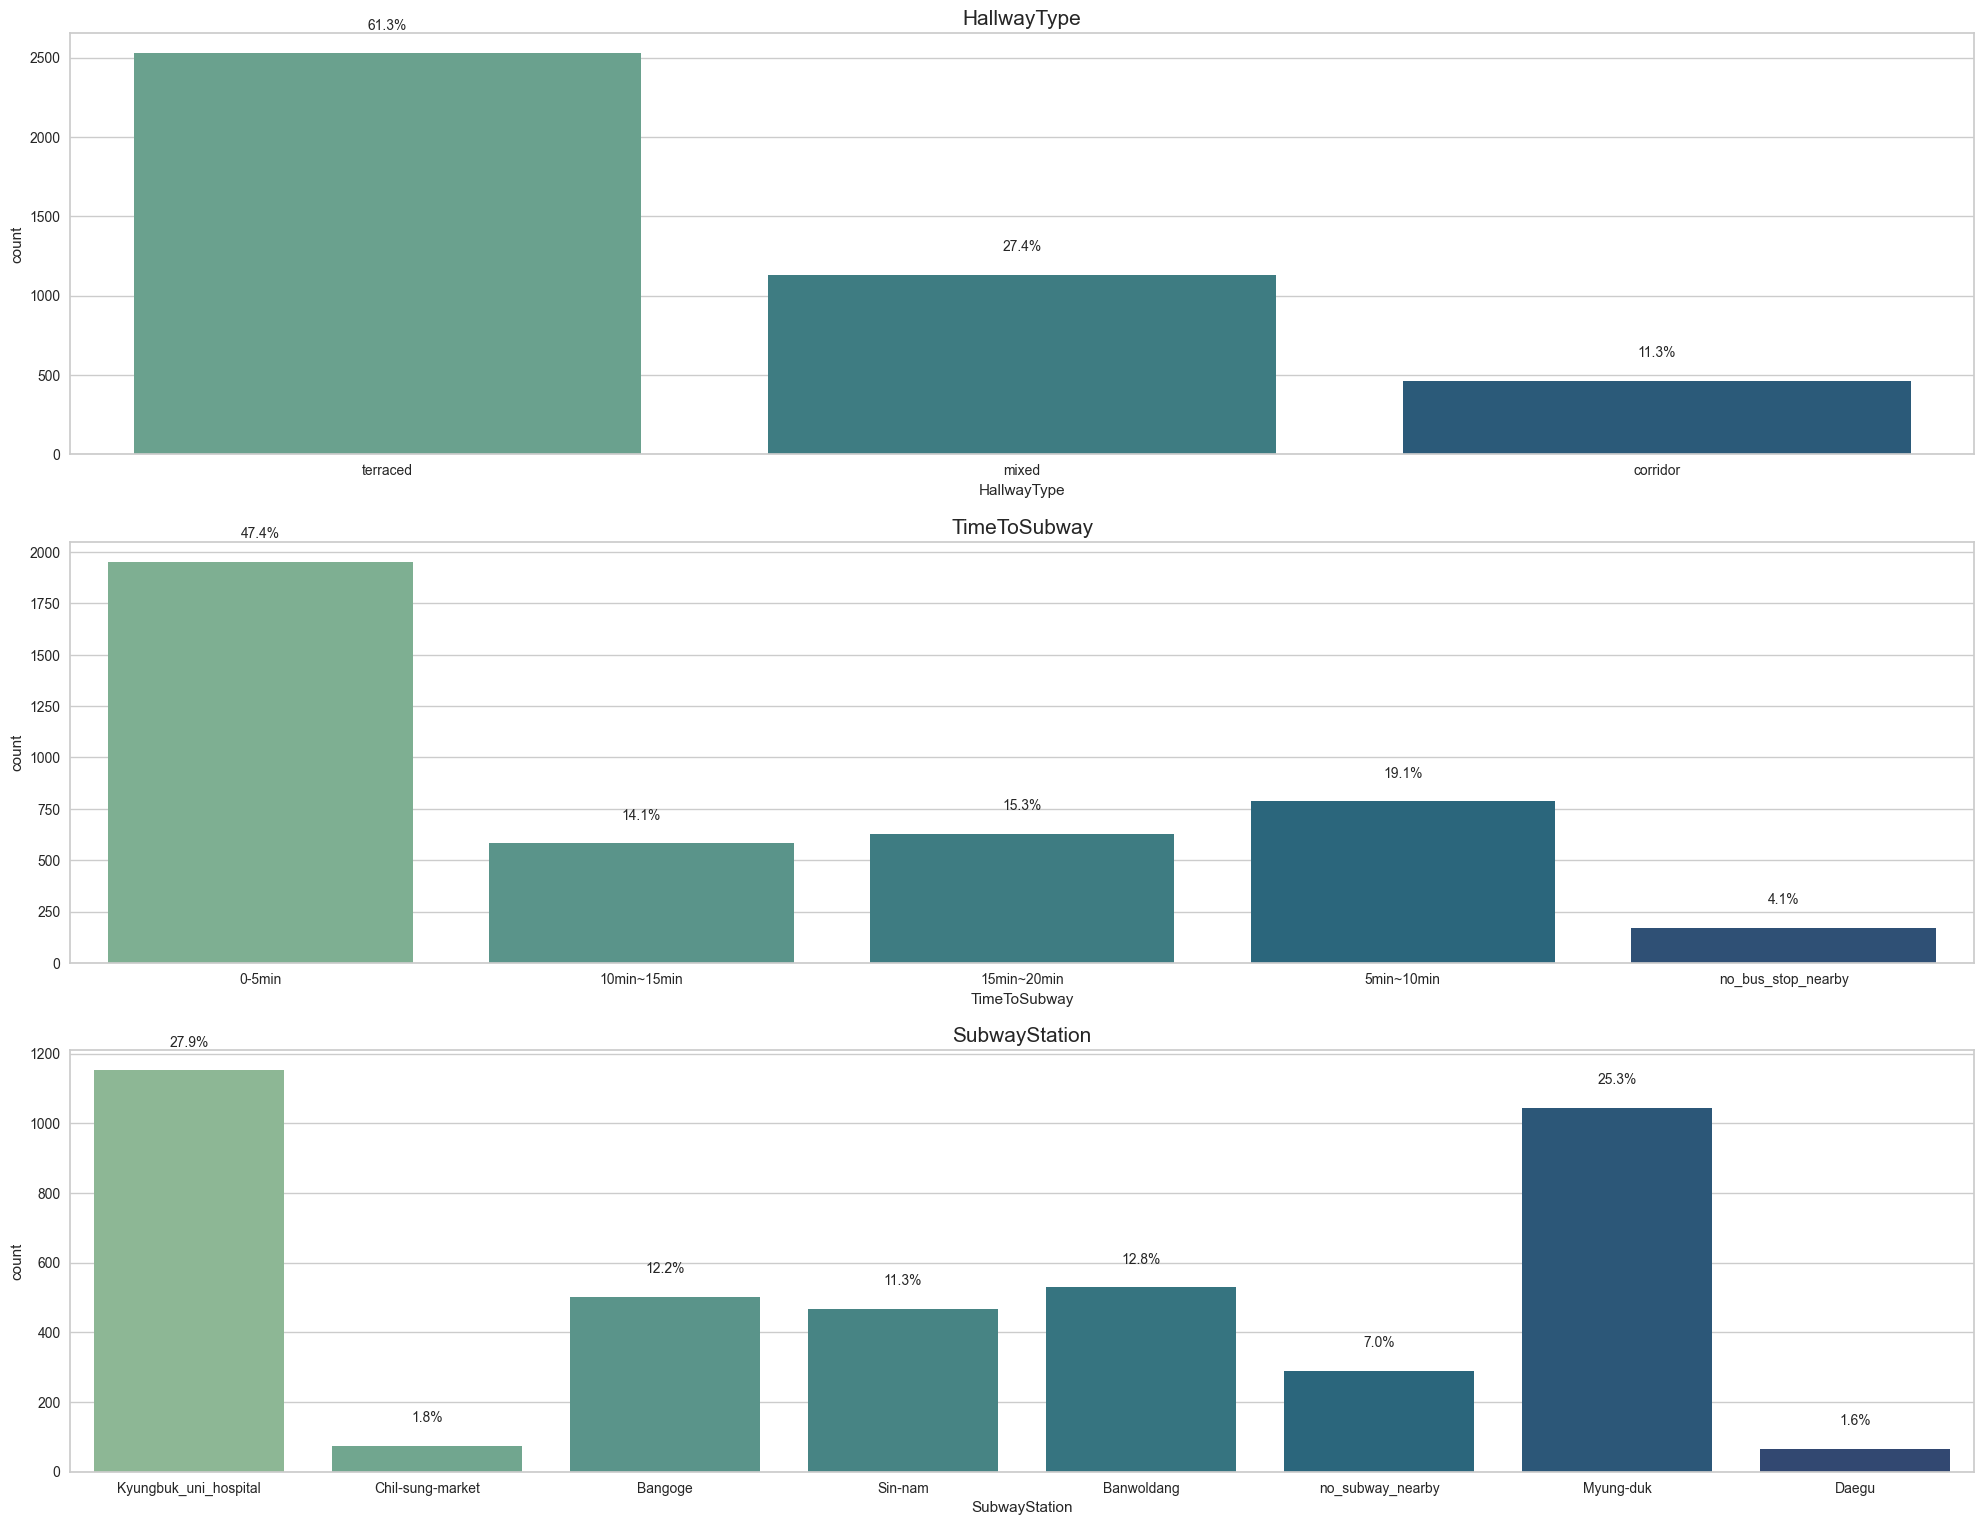

In [88]:

num_cols = len(df.select_dtypes(include=['object']).columns)
fig, axes = plt.subplots(num_cols, 1, figsize=(20, 5 * num_cols))

if num_cols == 1:
    axes = [axes]

for i, column in enumerate(df.select_dtypes(include=['object']).columns):
    
    ax = sns.countplot(data=df, x=column, ax=axes[i], palette="crest")
    axes[i].set_title(column, fontsize=15)

    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 20), 
                     textcoords='offset points',
                     fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=1)
plt.show()


Distribusi Data Pada kolom Kategorikal.

Pada Kolom HallwayType Terdiri Dari 3 unique value:
* 'Terrace' 61.3%
* 'Mixed' 27.4%
* 'Corridor' 11.3%.

Pada Kolom TimeToSubway Terdiri Dari 5 unique value:
* '0-5 min' 47.4%,
* '5-10 min' 14.1%
* '10-15 min' 15.3%
* '15min-20min' 19.1%
* 'no_bus_stop_nearby' 4.1%

Pada Kolom SubwayStation Terdiri Dari 8 unique value:
* 'Kyungbuk_uni_hospital' 27.9%
* 'Ching-sung-market' 1.8%
* 'Bangoge' 12.2%
* 'Sin-nam' 11.3%
* 'Banwoldang' 12.8%
* 'Myung-duk' 25.3%
* 'Daegu' 1.6%
* 'no_subway_nearby' 7.0%

### **2.3 Korelasi**

Pengecekan korelasi antar kolom yang ada pada dataset dengan menggunakan heatmap

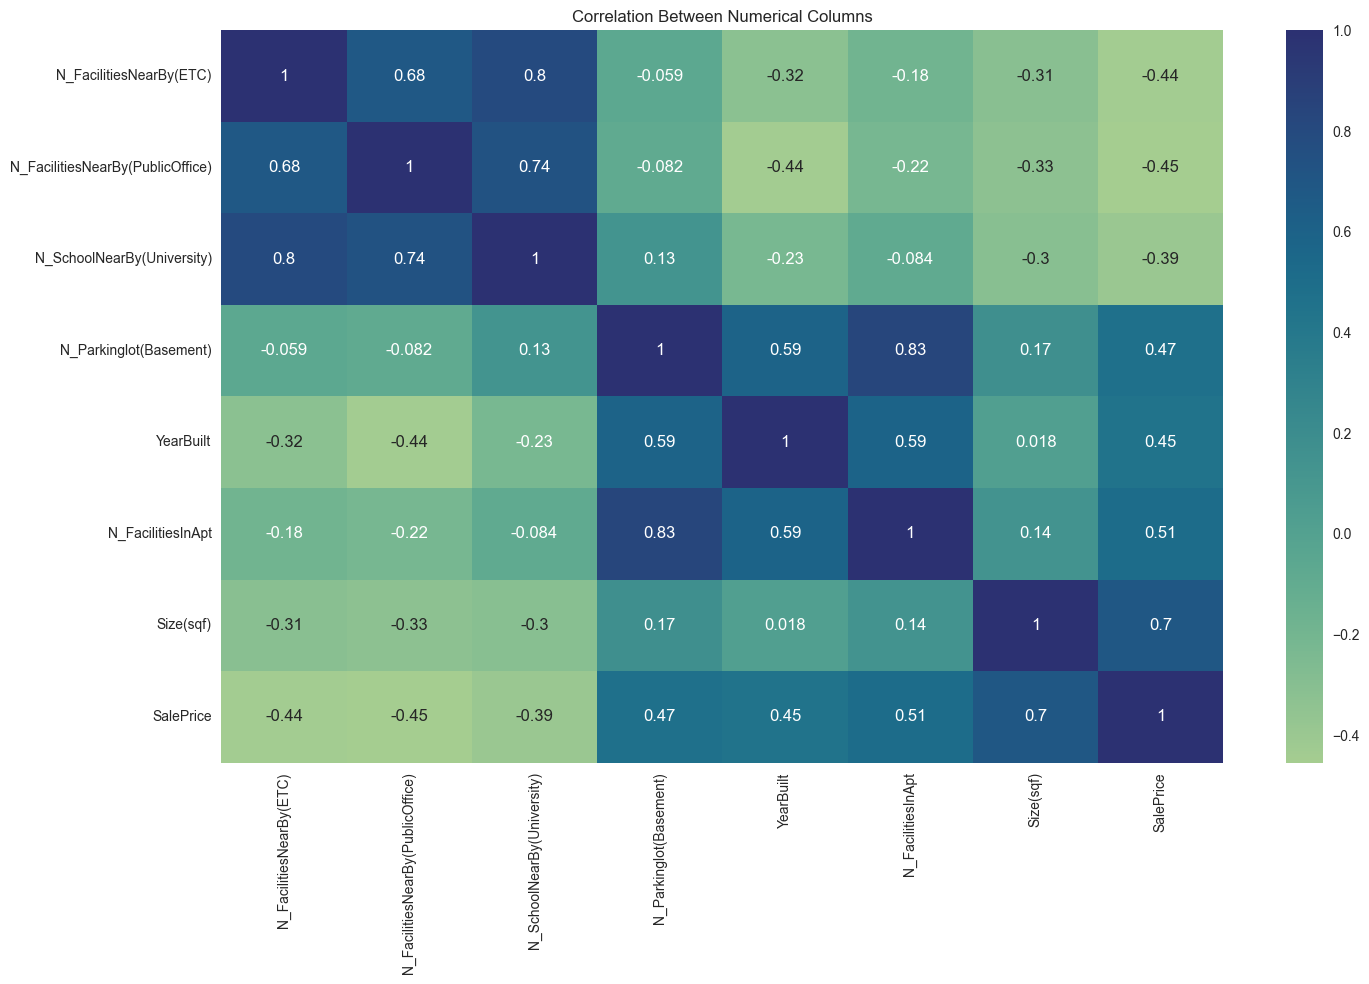

In [89]:
# Pilih hanya kolom numerik dari dataset
data_corr = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15, 10))
plt.title('Correlation Between Numerical Columns')

# Plot heatmap korelasi hanya untuk kolom numerik
sns.heatmap(data_corr.corr(), annot=True, cmap='crest')

plt.tight_layout()
plt.show()


Korelasi antara fitur dan harga apartemen:

* N_Parkinglot(basement) Dengan SalePrice: 0.47 (Positif)
* Size(sqf) Dengan SalePrice: 0.7 (Positif)
* N_FacilitiesInApt Dengan SalePrice: 0.51 (Positif)
* YearBuilt Dengan SalePrice: 0.45 (Positif)
* N_FacilitiesNearBy(PublicOffice) Dengan SalePrice: -0.45 (Negatif)
* N_SchoolNearBy(University) Dengan SalePrice: -0.39 (Negatif)
* N_FacilitiesNearBy(ETC) Dengan SalePrice: -0.44 (Negatif)

Positif: Semakin tinggi nilai fitur, semakin tinggi harga apartemen.

Negatif: Semakin tinggi nilai fitur, semakin rendah harga apartemen.

selain korelasi berdasarkan kolom numerikal, perlu juga dilihat keterkaitan antara kolom kategorikal terhadap harga, yaitu pada kolom TimeToSubway dan SubwayStation, HallwayType berikut adalah korelasinya:

### **2.4 Analisis**

#### 2.4.1 **Significance Test**

Mencari validasi feature terhadap target.

* Pengujian terhadap `Aspek Bangunan`

In [90]:
from scipy.stats import pearsonr
import numpy as np

# Memilih kolom numerik
cols_numeric = ['N_Parkinglot(Basement)', 'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)']
p_values = []

# Menghitung koefisien korelasi Pearson dan p-value untuk setiap kolom
for col in cols_numeric:
    corr, p_value = pearsonr(data_corr[col], data_corr['SalePrice'])
    p_values.append(p_value)
    print(f'p-value for {col}:', p_value)

# Menghitung dan mencetak mean dari semua p-value
mean_p_value = np.mean(p_values).round(4)
print(f'\nMean of all p-values: {mean_p_value}')

# Memeriksa apakah mean dari p-value memenuhi kriteria < 0.05
if mean_p_value < 0.05:
    print('\nThis criteria is valid.')
else:
    print('\nThis criteria is not valid.')


p-value for N_Parkinglot(Basement): 2.663668827068007e-228
p-value for YearBuilt: 4.9612584734864426e-201
p-value for N_FacilitiesInApt: 4.436212983514928e-271
p-value for Size(sqf): 0.0

Mean of all p-values: 0.0

This criteria is valid.


Kriteria dari Aspek Bangunan dibawah 0.05, maka dari itu dianggap signifikan / valid.

* Pengujian terhadap `Aspek Transportasi`

In [91]:
from sklearn.preprocessing import LabelEncoder

# Membuat salinan data untuk manipulasi
data_encoded = df.copy()

# Mengonversi kolom kategorikal menjadi numerik menggunakan Label Encoding
label_encoder = LabelEncoder()
for col in ['TimeToSubway', 'SubwayStation']:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

# Melakukan perhitungan korelasi Pearson setelah encoding
cols_categorical = ['TimeToSubway', 'SubwayStation']
p_values = []

for col in cols_categorical:
    corr, p_value = pearsonr(data_encoded[col], data_encoded['SalePrice'])
    p_values.append(p_value)
    print(f'p-value for {col}:', p_value)

# Menghitung dan mencetak mean dari semua p-value
mean_p_value = np.mean(p_values).round(4)
print(f'\nMean of all p-values: {mean_p_value}')

# Memeriksa apakah mean dari p-value memenuhi kriteria < 0.05
if mean_p_value < 0.05:
    print('\nThis criteria is valid.')
else:
    print('\nThis criteria is not valid.')


p-value for TimeToSubway: 3.5015870048220624e-211
p-value for SubwayStation: 0.17115450684900455

Mean of all p-values: 0.0856

This criteria is not valid.


Kriteria dari Aspek Transportasi dibawah 0.05, maka dari itu dianggap signifikan / valid.

In [92]:
from scipy.stats import pearsonr
import numpy as np

# Pilih beberapa kolom yang relevan
cols = ['N_SchoolNearBy(University)', 'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(ETC)']
p_values = []

# Hitung koefisien korelasi Pearson dan p-value untuk setiap kolom
for col in cols:
    corr, p_value = pearsonr(df[col], df['SalePrice'])
    p_values.append(p_value)
    print(f'p-value for {col}:', p_value)

# Hitung dan cetak mean dari semua p-value
mean_p_value = np.mean(p_values).round(4)
print(f'\nMean of all p-values: {mean_p_value}')

# Memeriksa apakah mean dari p-value memenuhi kriteria < 0.05
if mean_p_value < 0.05:
    print('\nThis criteria is valid.')
else:
    print('\nThis criteria is not valid.')


p-value for N_SchoolNearBy(University): 1.2425417830443112e-152
p-value for N_FacilitiesNearBy(PublicOffice): 2.9822068234554104e-209
p-value for N_FacilitiesNearBy(ETC): 8.5006129077692e-195

Mean of all p-values: 0.0

This criteria is valid.


Semua nilai p-value untuk setiap kriteria dan fitur berada di bawah 0,05.
maka dari itu dinyatakan bahwa setiap fitur memiliki relevansi yang kuat dengan target "SalePrice".

*a. TimeToSubway*

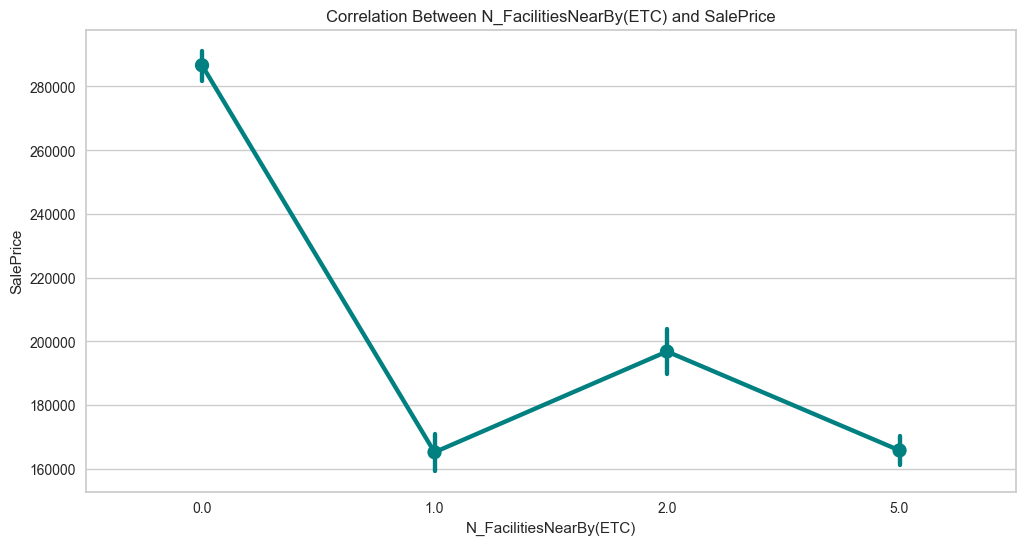

In [93]:
# Your existing line plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='N_FacilitiesNearBy(ETC)', y='SalePrice', data=df, color="teal")

# Define your new labels
# new_labels = ["0", "1", "2", "5"]

# Set the xticks to the new labels
# plt.xticks(range(1, 5), new_labels)

plt.title("Correlation Between N_FacilitiesNearBy(ETC) and SalePrice")

plt.show()

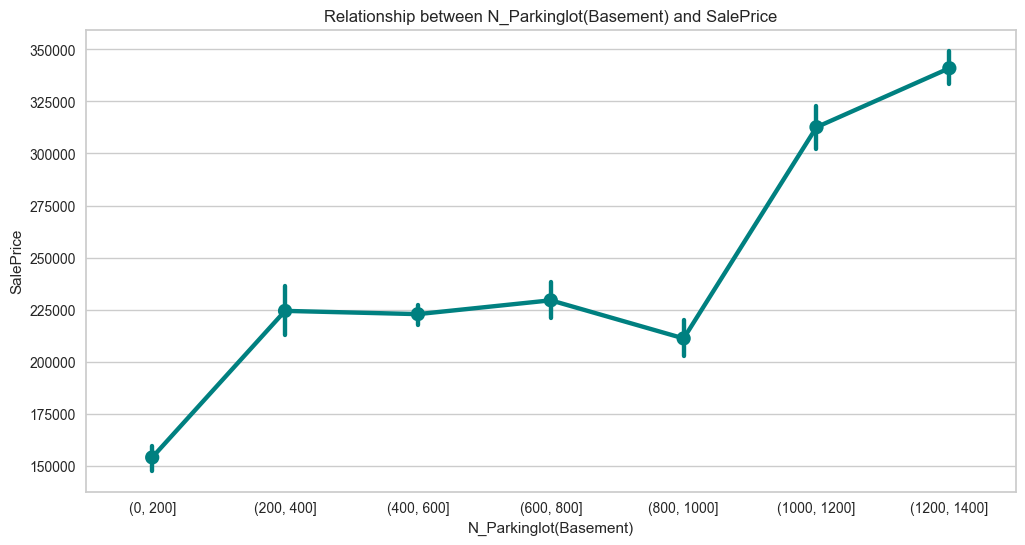

In [94]:
# Mengelompokkan data 'N_Parkinglot(Basement)' ke dalam rentang
df['Parkinglot_Group'] = pd.cut(df['N_Parkinglot(Basement)'], bins=[0, 200, 400, 600, 800, 1000, 1200, 1400])

# Membuat pointplot dengan data yang telah dikelompokkan
plt.figure(figsize=(12, 6))
sns.pointplot(x='Parkinglot_Group', y='SalePrice', color="teal", data=df)

plt.title('Relationship between N_Parkinglot(Basement) and SalePrice')
plt.xlabel('N_Parkinglot(Basement)')
plt.ylabel('SalePrice')
plt.show()

<Figure size 1200x600 with 0 Axes>

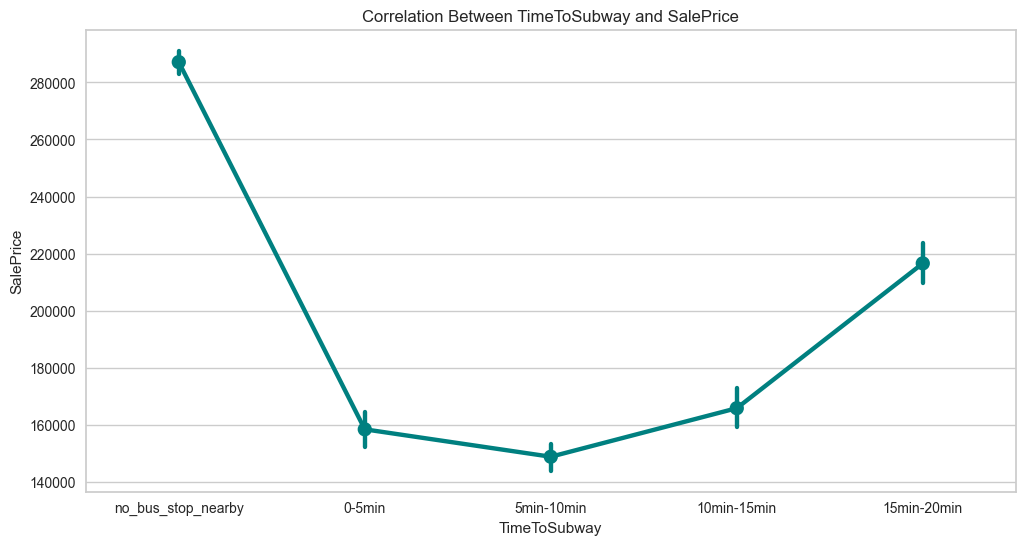

In [95]:
plt.figure(figsize=(12, 6))

# Periksa apakah 'TimeToSubway' ada di dataframe sebelum plot
if 'TimeToSubway' in df.columns and 'SalePrice' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.pointplot(x='TimeToSubway', y='SalePrice', data=df, color="teal")

    # Define your new labels
    new_labels = ["no_bus_stop_nearby", "0-5min", "5min-10min", "10min-15min", "15min-20min"]

    # Set the xticks to the new labels
    plt.xticks(range(0, 5), new_labels)

    plt.title("Correlation Between TimeToSubway and SalePrice")
    plt.show()

*b. SubwayStation*

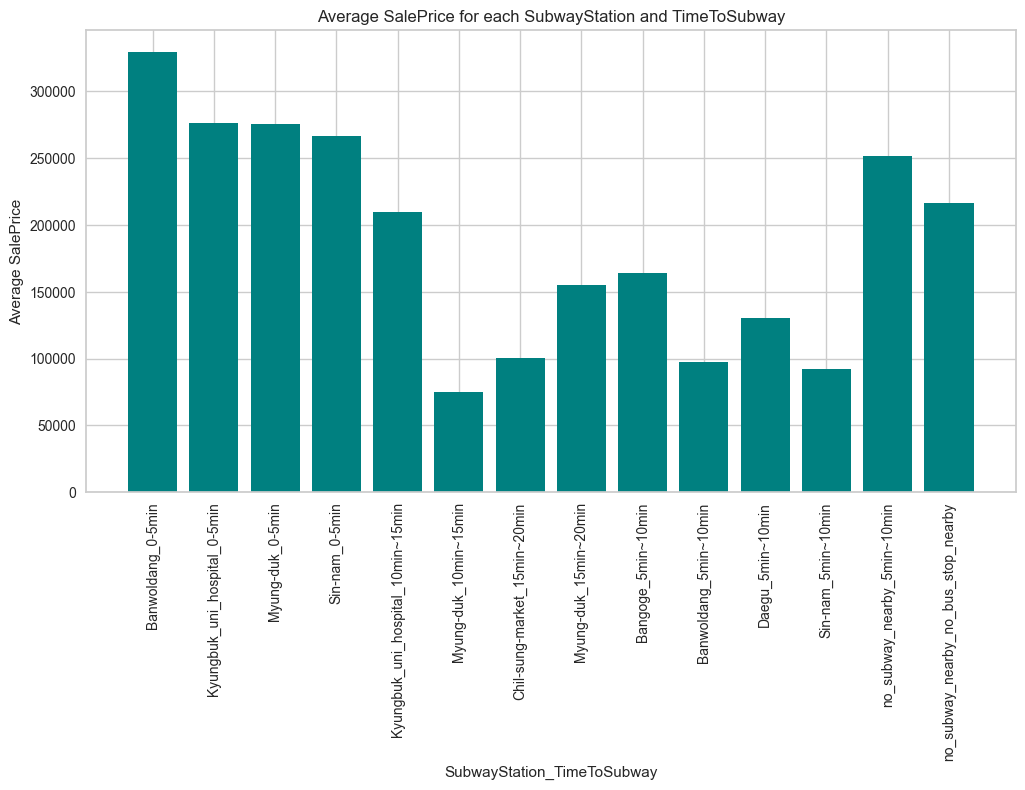

In [96]:

# Group data 'SubwayStation' dan 'TimeToSubway' serta hitung mean dari 'SalePrice'
avg_price = df.groupby(['SubwayStation', 'TimeToSubway'])['SalePrice'].mean().reset_index()

# Konversi kedua kolom menjadi string terlebih dahulu
avg_price['SubwayStation'] = avg_price['SubwayStation'].astype(str)
avg_price['TimeToSubway'] = avg_price['TimeToSubway'].astype(str)

# Buat kolom baru 'SubwayStation_TimeToSubway' lalu gabungkan 'SubwayStation' dan 'TimeToSubway'
avg_price['SubwayStation_TimeToSubway'] = avg_price['SubwayStation'] + "_" + avg_price['TimeToSubway']

# Sort DataFrame dari 'TimeToSubway'
avg_price = avg_price.sort_values('TimeToSubway')

# Plot data
plt.figure(figsize=(12, 6))
plt.bar(avg_price['SubwayStation_TimeToSubway'], avg_price['SalePrice'], color="teal")
plt.title('Average SalePrice for each SubwayStation and TimeToSubway')
plt.xlabel('SubwayStation_TimeToSubway')
plt.ylabel('Average SalePrice')
plt.xticks(rotation=90)
plt.show()


berdasarkan grafik diatas, menunjukan rerata harga apartemen berdasarkan stasiun dengan waktu tempuhnya, Sumbu **x** menunjukan stasiun dengan waktu tempuhnya dan untuk sumbu **y** menampilkan harga apartemennya (*Korean Won*) 

### **2.5 Data Cleaning and Preprocessing**

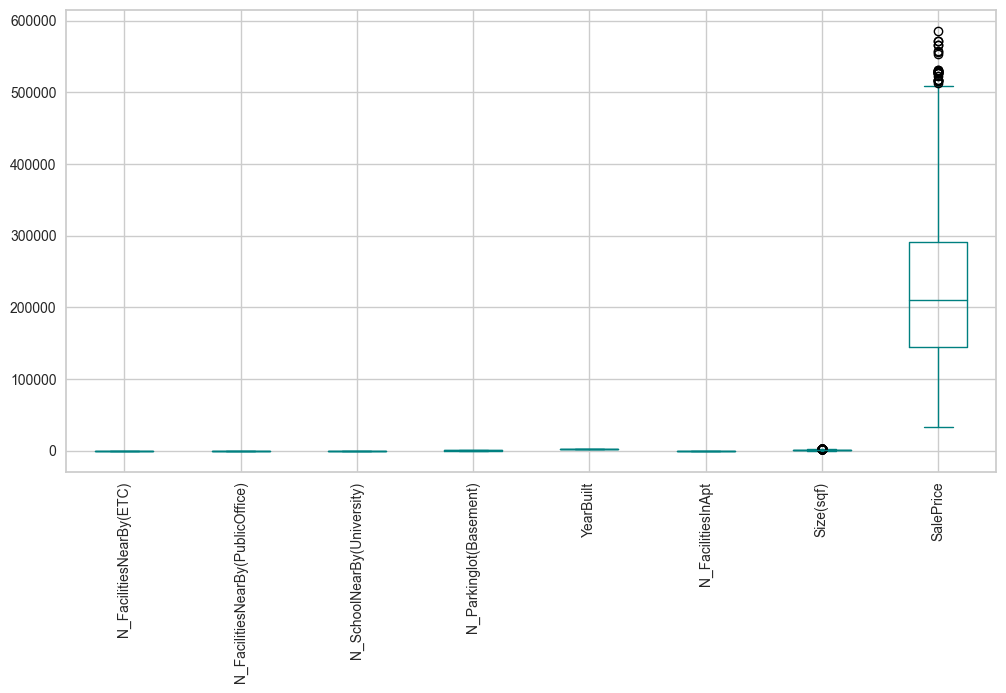

In [97]:
plt.figure(figsize=(12, 6))
df.boxplot(rot=90, color="teal")
plt.show()


In [98]:
cols = df.select_dtypes(include=[np.number]).columns

lower_bound = [df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else None for col in cols]
upper_bound = [df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else None for col in cols]

count_below_lower_bound = [df[col][df[col] < lower_bound[i]].count() if lower_bound[i] is not None else None for i, col in enumerate(cols)]
count_above_upper_bound = [df[col][df[col] > upper_bound[i]].count() if upper_bound[i] is not None else None for i, col in enumerate(cols)]

pd.DataFrame({
    'count_Lbound': count_below_lower_bound,
    'count_Ubound': count_above_upper_bound,
    'Lbound': lower_bound,
    'Ubound': upper_bound,
    '%L_bound': [(count_below_lower_bound[i] / len(df) * 100).round(2) if count_below_lower_bound[i] is not None else None for i in range(len(cols))],
    '%U_bound': [(count_above_upper_bound[i] / len(df) * 100).round(2) if count_above_upper_bound[i] is not None else None for i in range(len(cols))],
    'n_unique': df[cols].nunique().values,
    'sample_unique': [df[col].unique() for col in cols]}, index=cols
)

,count_Lbound,count_Ubound,Lbound,Ubound,%L_bound,%U_bound,n_unique,sample_unique
N_FacilitiesNearBy(ETC),0,0,-7.5,12.5,0.0,0.00,4,"[0.0, 1.0, 5.0, 2.0]"
N_FacilitiesNearBy(PublicOffice),0,0,0.0,8.0,0.0,0.00,8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
N_SchoolNearBy(University),0,0,-1.0,7.0,0.0,0.00,6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
N_Parkinglot(Basement),0,0,-737.0,1719.0,0.0,0.00,20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76...."
YearBuilt,0,0,1970.5,2030.5,0.0,0.00,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
N_FacilitiesInApt,0,0,-0.5,11.5,0.0,0.00,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
Size(sqf),0,98,-113.5,1906.5,0.0,2.38,89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, ..."
SalePrice,0,27,-74845.0,510747.0,0.0,0.65,838,"[346017, 150442, 61946, 165486, 311504, 118584, 326548, 143362, 172566, 99823, 211504, 305309, 145132, 209734, 16814..."


* Ada 2 Fitur Yang Memiliki Outlier Data Yaitu Size(sqf) Sebanyak 2.4% dan SalePrice Sebanyak 0.7% Dari Total Data.
* Variabel Size(sqf) memiliki nilai minimum 156 dan maksimum 1.743, dengan rata-rata 962,94. Variabel ini memiliki outlier bawah sebanyak 2,4%, dan outlier atas sebanyak 0%. Variabel ini memiliki 89 nilai unik. Ini berarti bahwa properti yang dijual memiliki variasi ukuran, tetapi ada beberapa properti yang memiliki ukuran terlalu kecil dibandingkan dengan properti lainnya.
* Variabel SalePrice memiliki nilai minimum 16.814 dan maksimum 840.592, dengan rata-rata 296.081,64. Variabel ini memiliki outlier bawah sebanyak 0%, dan outlier atas sebanyak 0,7%. Variabel ini memiliki 838 nilai unik. Ini berarti bahwa properti yang dijual memiliki variasi harga, tetapi ada beberapa properti yang memiliki harga terlalu tinggi dibandingkan dengan properti lainnya.

In [99]:
# show data description
cols =['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice']

pd.DataFrame({
    'data_type': df[cols].dtypes.values
}, index=cols)

,data_type
HallwayType,object
TimeToSubway,object
SubwayStation,object
N_FacilitiesNearBy(ETC),float64
N_FacilitiesNearBy(PublicOffice),float64
N_SchoolNearBy(University),float64
N_Parkinglot(Basement),float64
YearBuilt,int64
N_FacilitiesInApt,int64
Size(sqf),int64


`Rare Label and Cardinality`

Saya Akan Menggunakan Data Yang Sudah Diubah Menjadi Data Ordinal.

In [100]:
cols = ['HallwayType', 'TimeToSubway', 'SubwayStation']

# For each column in the DataFrame
for column_name in cols:
    # Select the column to analyze
    column = df[column_name]

    # Get the count of each unique value
    value_counts = column.value_counts()

    # Calculate the percentage of each unique value
    value_percentages = value_counts / len(df) * 100

    # Print the unique values and their percentages
    print(f"Unique values and their percentages for {column_name}:")
    for value, percentage in value_percentages.items():
        print(f"{value}: {percentage:.2f}%")
    print("\n")

Unique values and their percentages for HallwayType:
terraced: 61.31%
mixed: 27.43%
corridor: 11.25%


Unique values and their percentages for TimeToSubway:
0-5min: 47.37%
5min~10min: 19.09%
15min~20min: 15.26%
10min~15min: 14.14%
no_bus_stop_nearby: 4.15%


Unique values and their percentages for SubwayStation:
Kyungbuk_uni_hospital: 27.94%
Myung-duk: 25.32%
Banwoldang: 12.83%
Bangoge: 12.18%
Sin-nam: 11.33%
no_subway_nearby: 7.03%
Chil-sung-market: 1.79%
Daegu: 1.58%





Setelah mengevaluasi kardinalitas kolom kategorikal dalam dataset, ditemukan bahwa:

Jenis Lorong (HallwayType) memiliki kardinalitas sebanyak 3. Tidak ada peringatan mengenai kardinalitas tinggi untuk kolom ini.
Waktu ke Subway (TimeToSubway) memiliki kardinalitas sebanyak 5. Tidak ada peringatan mengenai kardinalitas tinggi untuk kolom ini.
Stasiun Subway (SubwayStation) memiliki kardinalitas sebanyak 8. Tidak ada peringatan mengenai kardinalitas tinggi untuk kolom ini.
Tidak ada kolom kategorikal yang memiliki kardinalitas tinggi (dengan lebih dari 10 nilai unik) dalam dataset ini. Oleh karena itu, tidak ada kebutuhan mendesak untuk mengatasi masalah kardinalitas tinggi, seperti menggunakan teknik pengkodean atau pengelompokan, untuk kolom-kolom tersebut.

`Collinearity`

In [101]:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define Features
X = df[['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)']]

# Define target
y = df['SalePrice']

# Fit the OLS regression model
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

# Calculate VIF for each predictor variable
vif = pd.DataFrame(index=X.columns)
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
vif

,VIF
N_FacilitiesNearBy(ETC),5.474361
N_FacilitiesNearBy(PublicOffice),15.342707
N_SchoolNearBy(University),18.284972
N_Parkinglot(Basement),12.254853
YearBuilt,34.327180
N_FacilitiesInApt,27.840728
Size(sqf),8.567090


Semua variabel ini menunjukkan nilai VIF yang cukup tinggi, semua bahkan melebihi 5, mengindikasikan adanya kolinearitas yang signifikan.

Dalam konteks industri real estat Daegu, kolinearitas ini dapat mencerminkan keterkaitan yang erat antara fitur-fitur apartemen, seperti ukuran, fasilitas, dan tahun pembangunan, dalam menentukan nilai jual. Sebagai contoh, apartemen yang lebih baru cenderung dilengkapi dengan lebih banyak fasilitas, yang mungkin juga memengaruhi ukuran apartemen.

Meskipun demikian, mengingat konteks bisnis dan tujuan analisis, mungkin tidak perlu menghapus variabel-variabel ini meskipun menunjukkan kolinearitas yang tinggi. Hal ini disebabkan oleh kemungkinan pentingnya setiap variabel dalam menentukan harga jual dan kemampuannya memberikan wawasan yang berharga untuk model prediktif. Oleh karena itu, kendati terdapat kolinearitas, pertimbangan bisnis dan konteks analisis sebaiknya diperhitungkan untuk menentukan apakah variabel-variabel tersebut perlu diubah atau dihapus.

`Negative Value`


In [102]:
# show data description
cols =['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice']

pd.DataFrame({
    'negative': [df[col][df[col] < 0].sum() if df[col].dtype == 'int64' or df[col].dtype == 'float64' else None for col in cols],
    '%negative': [(df[col][df[col] < 0].sum() / df.shape[0] * 100).round(2) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else None for col in cols],
}, index=cols)

,negative,%negative
HallwayType,NaN,NaN
TimeToSubway,NaN,NaN
SubwayStation,NaN,NaN
N_FacilitiesNearBy(ETC),0.0,0.0
N_FacilitiesNearBy(PublicOffice),0.0,0.0
N_SchoolNearBy(University),0.0,0.0
N_Parkinglot(Basement),0.0,0.0
YearBuilt,0.0,0.0
N_FacilitiesInApt,0.0,0.0
Size(sqf),0.0,0.0


Ringkasan Masalah Data:

Terdapat Outliers Data pada kolom 'Size(sqf)' dan 'SalePrice' sekitar 2,38% dari total data.
Terdapat korelasi tinggi dalam data yang membuat data tidak stabil. Ini dapat dilihat dari nilai VIF yang semuanya di atas 5.
Terdapat data yang diduplikasi sekitar 34,5% yang perlu dihapus.
Terdapat label yang jarang muncul pada kolom 'SubwayStation' dengan batas 3% yang perlu dihapus.
Tidak ada nilai negatif, nilai yang hilang, tipe data yang salah, atau nama kolom yang salah.
Terdapat nilai yang salah pada kolom 'TimeToSubway' dengan nilai '5min~10min' dan 'SubwayStation' dengan nilai 'no_subway_nearby' yang perlu dihapus.

`Missing Value`

In [103]:
df.isna().sum()


HallwayType                           0
TimeToSubway                          0
SubwayStation                         0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(PublicOffice)      0
N_SchoolNearBy(University)            0
N_Parkinglot(Basement)                0
YearBuilt                             0
N_FacilitiesInApt                     0
Size(sqf)                             0
SalePrice                             0
Parkinglot_Group                    493
dtype: int64

Data ini tidak memiliki missing value, yang berarti semua kategori data memiliki nilai yang lengkap dan tidak ada yang kosong atau tidak diketahui. Ini adalah hal yang baik, karena missing value dapat menyebabkan masalah dalam analisis data, seperti mengurangi validitas statistik, menyebabkan bias, atau mengganggu proses pemodelan. Anda dapat melihat bahwa data ini tidak memiliki missing value dari grafik yang tidak memiliki batang putih. Batang putih menunjukkan nilai yang hilang, sedangkan batang hitam menunjukkan nilai yang ada. Jika data memiliki missing value, maka grafik akan memiliki beberapa batang putih di antara batang hitam. Namun, grafik ini hanya memiliki batang hitam, yang berarti tidak ada missing value.

Grafik ini juga menunjukkan bahwa data diurutkan berdasarkan jumlah nilai yang hilang, dari yang paling sedikit hingga yang paling banyak. Hal ini dapat dilihat dari garis putih tipis di sisi kanan grafik. Garis putih ini menunjukkan batas antara kategori data yang memiliki nilai yang lengkap dan kategori data yang memiliki nilai yang hilang. Jika data memiliki missing value, maka garis putih ini akan berada di tengah-tengah grafik, membagi grafik menjadi dua bagian. Namun, grafik ini hanya memiliki garis putih di sisi kanan, yang berarti semua kategori data memiliki nilai yang lengkap.

`Data Duplicated`

In [105]:

df.duplicated().sum()
# df.drop(columns=['ParkingLot_Group'], inplace=True)

1422

In [106]:
df.duplicated().sum()/len(df.index)*100

34.48944943002668

1422 data merupakan 34,49% dari total jumlah data. Jumlah yang cukup besar untuk dieliminasi. Selanjutnya akan coba diidentifikasi contoh dari data yang teridentifikasi sebagai data yang terduplikat

In [107]:
df.sort_values('SalePrice', ascending=False).head(41)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,Parkinglot_Group
2128,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,585840,"(1200, 1400]"
2918,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,570796,"(1200, 1400]"
550,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,570796,"(1200, 1400]"
204,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,566371,"(1200, 1400]"
234,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,566371,"(1200, 1400]"
3545,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,557522,"(1200, 1400]"
3949,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,556637,"(1200, 1400]"
549,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,553097,"(1200, 1400]"
2100,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1519,530973,"(1200, 1400]"
1180,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,530973,"(1200, 1400]"


In [108]:
df.sort_values('SalePrice', ascending=True).head(41)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,Parkinglot_Group
1908,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,32743,NaN
3625,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,34070,NaN
804,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,34513,NaN
163,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,34513,NaN
1210,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35398,NaN
2262,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,35398,"(200.0, 400.0]"
1068,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35398,NaN
647,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,35398,"(200.0, 400.0]"
3961,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35840,NaN
898,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35840,NaN


Dua dataframe di atas menunjukkan sekitar 1% data dengan Sale Price tertinggi dan 1% data Sale Price terendah. Dari 2 dataframe tersebut dapat dilihat bahwa banyak data yang seakan-akan merupakan duplikat, namun persamaan data dari masing-masing row bisa jadi merupakan data masing-masing apartment dalam gedung yang sama, dengan tipe ruangan yang sama, namun berbeda nomor kamar/apartment, sehingga memiliki ciri-ciri yang sama dan harga yang sama pula. Jadi data-data tersebut diputuskan tidak dianggap sebagai duplikasi.

In [109]:
# Group the data by 'SubwayStation' and 'TimeToSubway', and calculate the size of each group
grouped_data = df.groupby(['SubwayStation', 'TimeToSubway']).size()

# Calculate the total size of the data
total_size = df.shape[0]

# Calculate the percentage
percentage_data = grouped_data / total_size * 100

# Print the percentage data
percentage_data

SubwayStation          TimeToSubway      
Bangoge                5min~10min            12.175600
Banwoldang             0-5min                11.617754
                       5min~10min             1.212709
Chil-sung-market       15min~20min            1.794810
Daegu                  5min~10min             1.576522
Kyungbuk_uni_hospital  0-5min                19.185059
                       10min~15min            8.755760
Myung-duk              0-5min                 6.475867
                       10min~15min            5.384429
                       15min~20min           13.461072
Sin-nam                0-5min                10.089740
                       5min~10min             1.236963
no_subway_nearby       5min~10min             2.886248
                       no_bus_stop_nearby     4.147465
dtype: float64

### **2.6 Feature Engineering**

Untuk membuat pipeline dengan feature creation, scaling, dan encoding yang spesifik, langkah-langkahnya akan mencakup pembuatan fitur baru yang relevan dengan konteks pasar real estat di Daegu dan seleksi fitur yang berdasarkan kinerja mereka dalam memprediksi harga jual.


In [110]:
# Split data into Seen And Unseen Data
from sklearn.model_selection import train_test_split

seen, unseen = train_test_split(df, test_size=0.2, random_state=2020)

# Show data description
print(f"Jumlah Baris,Kolom Seen : {seen.shape}")
print(f"Jumlah Baris,Kolom Unseen : {unseen.shape}")

Jumlah Baris,Kolom Seen : (3298, 12)
Jumlah Baris,Kolom Unseen : (825, 12)


In [111]:
print(df.dtypes)

HallwayType                           object
TimeToSubway                          object
SubwayStation                         object
N_FacilitiesNearBy(ETC)              float64
N_FacilitiesNearBy(PublicOffice)     float64
N_SchoolNearBy(University)           float64
N_Parkinglot(Basement)               float64
YearBuilt                              int64
N_FacilitiesInApt                      int64
Size(sqf)                              int64
SalePrice                              int64
Parkinglot_Group                    category
dtype: object


In [112]:
df_cleaned_2 = df.to_csv('data_daegu_apartment_cleaned.csv', index=False)
data_seen = seen.to_csv('data_daegu_apartment_seen.csv', index=False)
data_unseen = unseen.to_csv('data_daegu_apartment_useen.csv', index=False)

---
## **4. MODELLING**
---

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import lightgbm
import pycaret
from scipy.stats import mstats
from typing import Literal
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from category_encoders import OrdinalEncoder
from datetime import datetime
from pycaret.internal.preprocess.transformers import TransformerWrapper, ExtractDateTimeFeatures
from mlxtend.feature_selection import ColumnSelector
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error
from pycaret.regression import *
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
import shap
import warnings
warnings.filterwarnings('ignore')

| Method | Action |
| ---- | ---------- |
| Outlier | Winsorize (kolom Size(sqf)) | 
| Min Max Scaling | Transform Numeric Features Such As **'N_Parkinglot(Basement)'**, **'N_FacilitiesInApt'**, **'Size(sqf)'** Into Scale Based On Mean On That Data | 
| One Hot Encoding | Mengubah **'SubwayStation'** dengan one-hot encoding atau label encoding. | 
| Ordinal Encoding | Mengubah **'TimeToSubway'**, **'HallwayType'**, **'N_FacilitiesNearBy(ETC)'**, **'N_SchoolNearBy(Universities)'**, **'N_FacilitiesNearBy(PublicOffice)'** dengan menggunakan ordinal encoding. |
| Usia Bangunan | Hitung usia properti dari fitur **'YearBuilt'** untuk menangkap efek penyusutan atau apresiasi seiring waktu. |
| Binning	 | Transformasi fitur numerik kontinu seperti **'AgeProperty'** menjadi variabel kategorikal di mana **'AgeProperty'** dikelompokkan menjadi nilai 3, 2, 1. |


In [114]:
features = df.drop('SalePrice', axis=1)
target = df['SalePrice']

# Define the features for each encoding type
min_max_features = ['N_Parkinglot(Basement)', 'N_FacilitiesInApt', 'Size(sqf)']
categorical_features_onehot = ['SubwayStation']
ordinal_features = ['TimeToSubway', 'HallwayType', 'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(ETC)', 'N_SchoolNearBy(University)']
outlier_features = ['Size(sqf)']
facilities_features = ['N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(ETC)', 'N_SchoolNearBy(University)']
columns_to_drop = ['remainder__Size(sqf)_bins', 'remainder__N_FacilitiesInApt_bins', 
                   'remainder__N_FacilitiesNearBy(PublicOffice)_bins', 
                   'remainder__N_SchoolNearBy(University)_bins']

List Fitur masing-masing transformasi yang akan dilakukan pada Pipeline.



Winsorizing adalah suatu metode untuk mengatasi outlier dengan memotong atau menggantikan nilai-nilai ekstrem dengan nilai batas yang lebih rendah atau lebih tinggi (biasanya disebut sebagai nilai ambang bawah dan ambang atas). berikut adalah kode dari winsorizing untuk menangnani outlier

In [115]:
from scipy.stats.mstats import winsorize

class HandleOutlier(BaseEstimator, TransformerMixin, OneToOneFeatureMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        X['Size(sqf)'] = winsorize(X['Size(sqf)'], limits=(0.01, 0.01))
        return X

    def set_output(self, transform: Literal['default', 'pandas']):
        return super().set_output(transform=transform)

Kode di bawah mendefinisikan sebuah kelas yang disebut AgeBinner yang bertujuan untuk mengubah kolom 'AgeProperty' dalam dataframe X menjadi kolom baru 'Binned_AgeProperty', di mana nilai-nilai dalam kolom tersebut dikelompokkan ke dalam kategori berdasarkan interval yang telah ditentukan.

In [116]:
class AgeBinner(BaseEstimator, TransformerMixin, OneToOneFeatureMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        X['Binned_AgeProperty'] = pd.cut(X['AgeProperty'], bins=[0, 20, 35, 50], labels=[3, 2, 1])
        return X

    def set_output(self, transform: Literal['default', 'pandas']):
        return super().set_output(transform=transform)

Kode di bawah mendefinisikan kelas AgeTransformer, yang bertujuan untuk mengubah nilai dalam kolom 'YearBuilt' dari dataframe X menjadi kolom baru 'AgeProperty'. Kolom baru ini menunjukkan usia properti berdasarkan perhitungan tahun saat transformasi dilakukan (YearBuilt ke 2016).

In [117]:
class AgeTransformer(BaseEstimator, TransformerMixin, OneToOneFeatureMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        X['AgeProperty'] = 2016 - X['YearBuilt']
        return X

    def set_output(self, transform: Literal['default', 'pandas']):
        return super().set_output(transform=transform)

Code yang diberikan mendefinisikan kelas ColumnDropper yang berfungsi sebagai transformer dalam pipline pemrosesan data. Tujuan utama dari kelas ini adalah untuk menghapus kolom-kolom tertentu dari dataframe.

In [118]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(self.columns_to_drop, axis=1)

Pada bagian ini, MinMaxScaler dibuat untuk menskalakan fitur numerik dalam rentang 0 hingga 1. Hal ini umum dilakukan untuk memastikan bahwa semua fitur numerik memberikan kontribusi yang sama terhadap model dan mencegah fitur tertentu mendominasi karena skala yang besar.

In [119]:
min_max_transformer = MinMaxScaler(feature_range=(0, 1))

Untuk fitur kategorikal, dibuat OneHotEncoder. One-hot encoding digunakan untuk merepresentasikan variabel kategorikal sebagai vektor biner, di mana setiap kategori dipetakan ke nilai biner.

In [120]:
mappings = [
    {'col': 'TimeToSubway',
    'mapping': {
        'no_bus_stop_nearby': 0, 
        '0-5min': 4, 
        '5min~10min': 2, 
        '10min~15min': 2,
        '15min~20min': 1,
        }
    },
    {'col': 'HallwayType',
    'mapping': {
        'terraced': 3, 
        'mixed': 2, 
        'corridor': 1, 
        }
    },
    {'col': 'N_FacilitiesNearBy(PublicOffice)',
    'mapping': {
        0 : 4, 
        1 : 3, 
        2 : 2,
        5 : 1, 
        }
    },
    {'col': 'N_SchoolNearBy(University)',
    'mapping': {
        0 : 6, 
        1 : 5, 
        2 : 4,
        3 : 3,
        4 : 2,
        5 : 1, 
        }
    },
    {'col': 'N_FacilitiesNearBy(ETC)',
    'mapping': {
        0 : 4, 
        1 : 3, 
        2 : 2,
        5 : 1, 
        }
    },
]

ordinal_transformer = OrdinalEncoder

Sebuah ordinal encoder dibuat dengan pemetaan kustom untuk kolom seperti 'TimeToSubway', 'HallwayType', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', dan 'N_FacilitiesNearBy(ETC)'. Ordinal encoding ini digunakan ketika kategori memiliki urutan bermakna. Misalnya, di kolom 'TimeToSubway', kategori seperti 'no_bus_stop_nearby', '0-5min', '5min~10min', dll., dipetakan ke nilai 0, 5, 4, 3, 2, sesuai urutan.

In [121]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

min_max_transformer = MinMaxScaler()
categorical_transformer_onehot = OneHotEncoder(sparse_output=False)
ordinal_transformer = OrdinalEncoder()


In [122]:

preprocessor = [
    # Handle Outlier
    ('Outlier', TransformerWrapper(
        include=outlier_features,
        transformer=HandleOutlier())),

    # Create New Features Age
    ('Age', TransformerWrapper(
        include=['YearBuilt'],
        transformer=AgeTransformer())),
    
    # Binning Features Size(sqf) and SalePrice
    ('Binnning', TransformerWrapper(
        include=['AgeProperty'],
        transformer=AgeBinner())),
    
    # Transform Some Data
    ('Transform', ColumnTransformer(
    transformers=[
        ('minmax', min_max_transformer, min_max_features),
        ('onehot', categorical_transformer_onehot, categorical_features_onehot),
        ('ordinal', ordinal_transformer, ordinal_features),
    ], remainder='passthrough').set_output(transform='pandas')),

    # # Drop Columns
    # ('Drop', ColumnDropper(columns_to_drop)),
]

# Make a preprocessor pipeline
pipeline = Pipeline(steps=preprocessor)
pipeline

Pipeline(steps=[('Outlier',
                 TransformerWrapper(include=['Size(sqf)'],
                                    transformer=HandleOutlier())),
                ('Age',
                 TransformerWrapper(include=['YearBuilt'],
                                    transformer=AgeTransformer())),
                ('Binnning',
                 TransformerWrapper(include=['AgeProperty'],
                                    transformer=AgeBinner())),
                ('Transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax', MinMaxScaler(),
                                                  ['N_Parkinglot(Basement)',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['SubwayStation']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['TimeToSubway',
                                                   'HallwayType',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_FacilitiesNearBy(ETC)',
                                                   'N_SchoolNearBy(University)'])]))])

Keseluruhan Hasil Kelas Yang Sudah Didefinisikan Dimasukkan Ke Dalam Sebuah Pipeline. Pipeline Ini Akan Digunakan Untuk Memproses Data Sebelum Data Masuk Ke Dalam Model. Pipeline Ini Akan Mengikuti Urutan Seperti Di Atas.

In [123]:
pd.set_option('display.max_columns', None)
data = pipeline.fit_transform(features, target)
print(len(data.columns))
data.columns

20


Index(['minmax__N_Parkinglot(Basement)', 'minmax__N_FacilitiesInApt',
       'minmax__Size(sqf)', 'onehot__SubwayStation_Bangoge',
       'onehot__SubwayStation_Banwoldang',
       'onehot__SubwayStation_Chil-sung-market', 'onehot__SubwayStation_Daegu',
       'onehot__SubwayStation_Kyungbuk_uni_hospital',
       'onehot__SubwayStation_Myung-duk', 'onehot__SubwayStation_Sin-nam',
       'onehot__SubwayStation_no_subway_nearby', 'ordinal__TimeToSubway',
       'ordinal__HallwayType', 'ordinal__N_FacilitiesNearBy(PublicOffice)',
       'ordinal__N_FacilitiesNearBy(ETC)',
       'ordinal__N_SchoolNearBy(University)', 'remainder__YearBuilt',
       'remainder__Parkinglot_Group', 'remainder__AgeProperty',
       'remainder__Binned_AgeProperty'],
      dtype='object')

In [130]:
df.isna().sum()
df.drop(columns=['Parkinglot_Group'], inplace=True)

---
## **5. BENCHMARK MODEL**
---

### **5.1 Komparasi semua Regressor Model dengan Pycaret**

In [131]:
from pycaret.regression import setup, compare_models, pull


In [132]:
# Inisialisasi lingkungan pycaret dengan dataset yang telah diproses dan variabel target
exp_reg = setup(data=df, target='SalePrice', preprocess=False, custom_pipeline=pipeline, 
                use_gpu = False)

,Description,Value
0,Session id,2076
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(4123, 11)"
4,Transformed data shape,"(4123, 20)"
5,Transformed train set shape,"(2886, 20)"
6,Transformed test set shape,"(1237, 20)"
7,Numeric features,7
8,Categorical features,3


In [133]:
top_model = compare_models(n_select=5)
pull(top_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,34193.4940,1869590962.2170,43192.0209,0.8347,0.2238,0.1848,0.2950
et,Extra Trees Regressor,33974.6457,1875480582.6363,43266.2787,0.8340,0.2238,0.1826,0.2640
lightgbm,Light Gradient Boosting Machine,34030.2431,1890145596.9752,43414.3256,0.8328,0.2246,0.1834,0.2300
rf,Random Forest Regressor,33986.0405,1895396107.4292,43475.4897,0.8323,0.2249,0.1833,0.2830
dt,Decision Tree Regressor,34120.4816,1927468813.6072,43817.5008,0.8295,0.2264,0.1844,0.0750
knn,K Neighbors Regressor,35357.8080,2054104953.1228,45275.6846,0.8181,0.2365,0.1921,0.1120
ada,AdaBoost Regressor,42096.5125,2408374243.5541,49042.6531,0.7869,0.2824,0.2590,0.2500
ridge,Ridge Regression,42152.9961,2745401824.6499,52338.0233,0.7568,0.2682,0.2278,0.0740
br,Bayesian Ridge,42136.2670,2746977372.1217,52352.3942,0.7566,0.2681,0.2275,0.0730
lasso,Lasso Regression,42124.7172,2748196980.4265,52363.5717,0.7565,0.2681,0.2273,0.0980


Processing:   0%|          | 0/89 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,3.419349e+04,1.869591e+09,4.319202e+04,0.8347,0.2238,0.1848,0.295
et,Extra Trees Regressor,3.397465e+04,1.875481e+09,4.326628e+04,0.8340,0.2238,0.1826,0.264
lightgbm,Light Gradient Boosting Machine,3.403024e+04,1.890146e+09,4.341433e+04,0.8328,0.2246,0.1834,0.230
rf,Random Forest Regressor,3.398604e+04,1.895396e+09,4.347549e+04,0.8323,0.2249,0.1833,0.283
dt,Decision Tree Regressor,3.412048e+04,1.927469e+09,4.381750e+04,0.8295,0.2264,0.1844,0.075
knn,K Neighbors Regressor,3.535781e+04,2.054105e+09,4.527568e+04,0.8181,0.2365,0.1921,0.112
ada,AdaBoost Regressor,4.209651e+04,2.408374e+09,4.904265e+04,0.7869,0.2824,0.2590,0.250
ridge,Ridge Regression,4.215300e+04,2.745402e+09,5.233802e+04,0.7568,0.2682,0.2278,0.074
br,Bayesian Ridge,4.213627e+04,2.746977e+09,5.235239e+04,0.7566,0.2681,0.2275,0.073
lasso,Lasso Regression,4.212472e+04,2.748197e+09,5.236357e+04,0.7565,0.2681,0.2273,0.098


Komparasi Model Dengan Pycaret Default Dengan Resampling 10 Fold Cross Validation

Beberapa model regresi telah dibandingkan menggunakan berbagai metrik performa seperti MAE (Mean Absolute Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error), R² (R-squared), RMSLE (Root Mean Squared Logarithmic Error), MAPE (Mean Absolute Percentage Error), dan waktu pelatihan (TT).

Saya Pilih Top 5 Model Untuk Pengecekan Lebih Lanjut Yaitu:

* Gradient Boosting Regressor (Ensemble Model)
* Decision Tree Regressor (Base Model)
* LGBM Regressor (Ensemble Model)
* Random Forest Regressor (Ensemble Model)
* Extra Trees Regressor (Ensemble Model)

Karena Top 5 ini yang sering muncul pada compare_models di pycaret 5 besar meskipun posisinya berubah-ubah

In [ ]:
# create_model('xgboost')

### **5.2 Hyperparameter Tuning**

Berdasarkan Hasil Benchmark Model, Untuk Resampling 10 Fold Cross Validation Model Berjalan Lebih Baik Dibandingkan Tanpa Resampling. Oleh Karena Itu, Saya Akan Melakukan Hyperparameter Tuning Pada Model Dengan Resampling 10 Fold Cross Validation.



In [134]:
from numpy import linspace
from pycaret.regression import setup, create_model, tune_model
from sklearn.ensemble import GradientBoostingRegressor

# regression_setup = setup(data, target=df)

# for col in data.columns:
#     if pd.api.types.is_interval_dtype(data[col]):
#         data[col] = data[col].apply(lambda x: x.right)

hyperparam_gbr = {
    'n_estimators': [275, 300, 325],
    'learning_rate': [0.1, 0.105, 0.11],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4]
}   

tuned_gbr = tune_model(
                        estimator=create_model('gbr'),
                        custom_grid=hyperparam_gbr,
                        optimize='mape',
                        search_library='scikit-learn',
                        search_algorithm='random',
                        choose_better=True,
                        return_train_score=True,
                        verbose=True,
)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:26:38
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33986.8470,1860945878.1681,43138.6819,0.8287,0.2242,0.1845
1,35166.1182,1941851144.8771,44066.4401,0.8567,0.2231,0.1876
2,37029.9453,2253306634.0489,47469.0071,0.8049,0.2463,0.2052
3,32103.7947,1690739867.4246,41118.6073,0.8528,0.2179,0.1788
4,34167.0612,1862286629.5565,43154.2191,0.8158,0.2226,0.1843
5,35662.1105,1973810743.3281,44427.5899,0.8342,0.2149,0.1773
6,31066.6694,1558409311.4140,39476.6933,0.8606,0.2169,0.1711
7,34471.4039,1901019412.4702,43600.6813,0.8311,0.2215,0.1822
8,33701.8918,1762646047.5625,41983.8784,0.8461,0.2299,0.1954


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Berikut Hasil Tune Model Dengan Resampling 10 Fold Cross Validation Dengan Menggunakan Pycaret Sesuai Parameter Yang Sudah Ditentukan Pada Gradient Bossting Regressor.

In [135]:
hyperparam_dt = {
    'max_depth': [8, 9, 10],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

tuned_dt = tune_model(
                        estimator=create_model('dt'),
                        custom_grid=hyperparam_dt,
                        optimize='mape',
                        search_library='scikit-learn',
                        search_algorithm='random',
                        choose_better=True,
                        return_train_score=True,
                        verbose=True,
        )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33759.6036,1844723809.9184,42950.2481,0.8302,0.2221,0.1812
1,34464.1382,1922811748.4363,43849.8774,0.8581,0.2252,0.1856
2,37420.6020,2626940007.8513,51253.6829,0.7725,0.2637,0.2132
3,31557.9746,1682147417.2898,41013.9905,0.8535,0.2165,0.1752
4,33832.4754,1882746957.5982,43390.6321,0.8137,0.2227,0.1805
5,35566.0948,1988542597.5551,44593.0779,0.8329,0.2155,0.1763
6,31908.8619,1706998615.1108,41315.8398,0.8473,0.2279,0.1783
7,34489.4218,1914091259.0512,43750.3287,0.8299,0.2204,0.1804
8,33333.6114,1751865649.6856,41855.2942,0.8471,0.2273,0.1920


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Berikut Hasil Tune Model Dengan Resampling 10 Fold Cross Validation Dengan Menggunakan Pycaret Sesuai Parameter Yang Sudah Ditentukan Pada Decision Tree Regressor.

In [136]:
hyperparam_rf = {
    'n_estimators': linspace(50, 300, 10, dtype=int),
    'max_depth': linspace(1, 32, 32, dtype=int),
    'min_samples_split': linspace(2, 10, 9, dtype=int),
    'min_samples_leaf': linspace(1, 10, 10, dtype=int),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

tuned_rf = tune_model(
                        estimator=create_model('rf'),
                        custom_grid=hyperparam_rf,
                        optimize='mape',
                        search_library='scikit-learn',
                        search_algorithm='random',
                        choose_better=True,
                        return_train_score=True,
                        verbose=True,
        )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33730.8468,1847432151.6828,42981.7653,0.8299,0.2218,0.1809
1,34352.2542,1920248814.1131,43820.6437,0.8583,0.2251,0.1851
2,36966.5959,2420294519.6402,49196.4889,0.7904,0.2563,0.2079
3,31514.7787,1679311547.9677,40979.4039,0.8538,0.2163,0.1751
4,33694.1514,1869335389.9190,43235.8114,0.8151,0.2220,0.1797
5,35508.0524,1987588984.2983,44582.3842,0.8330,0.2152,0.1758
6,31700.9326,1637362180.4466,40464.3322,0.8536,0.2222,0.1749
7,34467.8364,1914015247.3028,43749.4600,0.8299,0.2205,0.1806
8,33236.4559,1747168108.1596,41799.1400,0.8475,0.2278,0.1922


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Berikut Hasil Tune Model Dengan Resampling 10 Fold Cross Validation Dengan Menggunakan Pycaret Sesuai Parameter Yang Sudah Ditentukan Pada Random Forest Regressor.

In [137]:
hyperparam_lightgbm = {
    'num_leaves': linspace(10, 200, 20, dtype=int),
    'max_depth': linspace(1, 15, 15, dtype=int),
    'learning_rate': linspace(0.01, 0.2, 20),
    'n_estimators': linspace(100, 1000, 10, dtype=int)
}

tuned_lightgbm = tune_model(
                        estimator=create_model('lightgbm'),
                        custom_grid=hyperparam_lightgbm,
                        optimize='mape',
                        search_library='scikit-learn',
                        search_algorithm='random',
                        choose_better=True,
                        return_train_score=True,
                        verbose=True,
        )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33899.4914,1854081987.3684,43059.0523,0.8293,0.2204,0.1805
1,34458.5070,1919818855.8701,43815.7375,0.8583,0.2252,0.1856
2,36995.2114,2399554913.0437,48985.2520,0.7922,0.2541,0.2075
3,31656.6708,1686009128.5509,41061.0415,0.8532,0.2172,0.1757
4,33820.9120,1874828998.8571,43299.2956,0.8145,0.2232,0.1813
5,35558.1239,1986468968.4026,44569.8213,0.8331,0.2161,0.1765
6,31390.1780,1593285900.7271,39915.9855,0.8575,0.2174,0.1711
7,34237.0860,1898551749.4308,43572.3737,0.8313,0.2198,0.1796
8,33352.2633,1748766101.9591,41818.2508,0.8473,0.2292,0.1933


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Berikut Hasil Tune Model Dengan Resampling 10 Fold Cross Validation Dengan Menggunakan Pycaret Sesuai Parameter Yang Sudah Ditentukan Pada Light Gradient Boosting Machine.

In [138]:
hyperparam_et = {
    'n_estimators': linspace(100, 500, 5, dtype=int),
    'max_depth': linspace(1, 32, 32, dtype=int),
    'min_samples_split': linspace(2, 10, 9, dtype=int),
    'min_samples_leaf': linspace(1, 10, 10, dtype=int),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

tuned_et = tune_model(
                        estimator=create_model('et'),
                        custom_grid=hyperparam_et,
                        optimize='mape',
                        search_library='scikit-learn',
                        search_algorithm='random',
                        choose_better=True,
                        return_train_score=True,
                        verbose=True,
        )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33723.9367,1843484213.3731,42935.8150,0.8303,0.2216,0.1808
1,34464.1382,1922811748.4363,43849.8774,0.8581,0.2252,0.1856
2,36419.8778,2216634744.0502,47081.1506,0.8081,0.2468,0.2011
3,31590.6393,1684170400.1454,41038.6452,0.8534,0.2165,0.1753
4,33832.4754,1882746957.5982,43390.6321,0.8137,0.2227,0.1805
5,35572.5498,1988430395.0187,44591.8198,0.8330,0.2156,0.1765
6,31524.2014,1603737824.3142,40046.6955,0.8566,0.2184,0.1724
7,34410.4905,1907128337.3562,43670.6805,0.8305,0.2203,0.1802
8,33346.7486,1752525127.0856,41863.1715,0.8470,0.2278,0.1924


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Ini Hasil Tune Model Dengan Resampling 10 Fold Cross Validation Dengan Menggunakan Pycaret Sesuai Parameter Yang Sudah Ditentukan Pada Extra Tree Regressor.

In [139]:
gbrparams = tuned_gbr.get_params()
gbrparams

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.11,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'random_state': 2076,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Ini Semua Parameter Yang Didapat Dari Hyperparameter Tuning Pada Model Gradient Boosting Regressor.



In [140]:
dtparams = tuned_dt.get_params()
dtparams

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 2076,
 'splitter': 'best'}

Ini Semua Parameter Yang Didapat Dari Hyperparameter Tuning Pada Model Decision Tree Regressor.

In [141]:
rfparams = tuned_rf.get_params()
rfparams

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 2076,
 'verbose': 0,
 'warm_start': False}

Ini Semua Parameter Yang Didapat Dari Hyperparameter Tuning Pada Model Random Forest Regressor.



In [142]:
lightgbmparams = tuned_lightgbm.get_params()
lightgbmparams

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.17,
 'max_depth': 3,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'num_leaves': 130,
 'objective': None,
 'random_state': 2076,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

Ini Semua Parameter Yang Didapat Dari Hyperparameter Tuning Pada Model Light Gradient Bossting Machine.



In [143]:
etparams = tuned_et.get_params()
etparams

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 29,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 2076,
 'verbose': 0,
 'warm_start': False}

Ini Semua Parameter Yang Didapat Dari Hyperparameter Tuning Pada Model Extra Tree Regressor.



### **5.3 Performance After Tuning**

`Tanpa Sampling`

In [144]:
print("Gradient Boosting Regressor")
result_gbr_unsampling = create_model('gbr', cross_validation=False).set_params(**gbrparams)
print("Random Forest Regressor")
result_rf_unsampling = create_model('rf', cross_validation=False).set_params(**rfparams)
print("Light Gradient Boosting Machine")
result_lightgbm_unsampling = create_model('lightgbm', cross_validation=False).set_params(**lightgbmparams)
print("Extra Trees Regressor")
result_et_unsampling = create_model('et', cross_validation=False).set_params(**etparams)
print("Decision Tree Regressor")
result_dt_unsampling = create_model('dt', cross_validation=False).set_params(**dtparams)

Gradient Boosting Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,33818.1084,1824945365.8657,42719.3793,0.8391,0.2194,0.1781


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Random Forest Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,33726.9912,1841887338.5785,42917.2149,0.8376,0.2218,0.1777


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Light Gradient Boosting Machine


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,33741.9160,1841968683.1015,42918.1626,0.8376,0.2216,0.1780


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Extra Trees Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,33689.3756,1838870916.3431,42882.0582,0.8379,0.2211,0.1769


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Decision Tree Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,33691.4476,1838903744.0552,42882.4410,0.8379,0.2211,0.1770


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Ini Semua Hasil Proses Hyperparameter Tuning Ke Model DTanpa Resampling 10 Fold Cross Validation


`Menggunakan Sampling`

In [145]:
print("Gradient Boosting Regressor")
result_gbr_sampling = create_model('gbr').set_params(**gbrparams)
print("Random Forest Regressor")
result_rf_sampling = create_model('rf').set_params(**rfparams)
print("Light Gradient Boosting Machine")
result_lightgbm_sampling = create_model('lightgbm').set_params(**lightgbmparams)
print("Extra Tree Regressor")
result_et_sampling = create_model('et').set_params(**etparams)
print("Decision Tree Regressor")
result_dt_sampling = create_model('dt').set_params(**dtparams)

Gradient Boosting Regressor


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Random Forest Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33730.8468,1847432151.6828,42981.7653,0.8299,0.2218,0.1809
1,34352.2542,1920248814.1131,43820.6437,0.8583,0.2251,0.1851
2,36966.5959,2420294519.6402,49196.4889,0.7904,0.2563,0.2079
3,31514.7787,1679311547.9677,40979.4039,0.8538,0.2163,0.1751
4,33694.1514,1869335389.9190,43235.8114,0.8151,0.2220,0.1797
5,35508.0524,1987588984.2983,44582.3842,0.8330,0.2152,0.1758
6,31700.9326,1637362180.4466,40464.3322,0.8536,0.2222,0.1749
7,34467.8364,1914015247.3028,43749.4600,0.8299,0.2205,0.1806
8,33236.4559,1747168108.1596,41799.1400,0.8475,0.2278,0.1922


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Light Gradient Boosting Machine


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33899.4914,1854081987.3684,43059.0523,0.8293,0.2204,0.1805
1,34458.5070,1919818855.8701,43815.7375,0.8583,0.2252,0.1856
2,36995.2114,2399554913.0437,48985.2520,0.7922,0.2541,0.2075
3,31656.6708,1686009128.5509,41061.0415,0.8532,0.2172,0.1757
4,33820.9120,1874828998.8571,43299.2956,0.8145,0.2232,0.1813
5,35558.1239,1986468968.4026,44569.8213,0.8331,0.2161,0.1765
6,31390.1780,1593285900.7271,39915.9855,0.8575,0.2174,0.1711
7,34237.0860,1898551749.4308,43572.3737,0.8313,0.2198,0.1796
8,33352.2633,1748766101.9591,41818.2508,0.8473,0.2292,0.1933


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Extra Tree Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33723.9367,1843484213.3731,42935.8150,0.8303,0.2216,0.1808
1,34464.1382,1922811748.4363,43849.8774,0.8581,0.2252,0.1856
2,36419.8778,2216634744.0502,47081.1506,0.8081,0.2468,0.2011
3,31590.6393,1684170400.1454,41038.6452,0.8534,0.2165,0.1753
4,33832.4754,1882746957.5982,43390.6321,0.8137,0.2227,0.1805
5,35572.5498,1988430395.0187,44591.8198,0.8330,0.2156,0.1765
6,31524.2014,1603737824.3142,40046.6955,0.8566,0.2184,0.1724
7,34410.4905,1907128337.3562,43670.6805,0.8305,0.2203,0.1802
8,33346.7486,1752525127.0856,41863.1715,0.8470,0.2278,0.1924


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Decision Tree Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33759.6036,1844723809.9184,42950.2481,0.8302,0.2221,0.1812
1,34464.1382,1922811748.4363,43849.8774,0.8581,0.2252,0.1856
2,37420.6020,2626940007.8513,51253.6829,0.7725,0.2637,0.2132
3,31557.9746,1682147417.2898,41013.9905,0.8535,0.2165,0.1752
4,33832.4754,1882746957.5982,43390.6321,0.8137,0.2227,0.1805
5,35566.0948,1988542597.5551,44593.0779,0.8329,0.2155,0.1763
6,31908.8619,1706998615.1108,41315.8398,0.8473,0.2279,0.1783
7,34489.4218,1914091259.0512,43750.3287,0.8299,0.2204,0.1804
8,33333.6114,1751865649.6856,41855.2942,0.8471,0.2273,0.1920


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Ini Semua Hasil Proses Hyperparameter Tuning Ke Model Dengan Sampling K-Fold.

---
## **6. FINAL MODEL DECISION**
---

* `Sebelum Tuning (Tanpa Sampling)`

Berdasarkan Benchmark dan Hyperparameter Tuning

* `Sebelum Tuning (Tanpa Sampling)`

In [146]:
pull(compare_models(['gbr', 'rf', 'lightgbm', 'et', 'dt'], cross_validation=False))

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:33:01
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,33818.1084,1824945365.8657,42719.3793,0.8391,0.2194,0.1781,0.8100
et,Extra Trees Regressor,33689.3756,1838870916.3431,42882.0582,0.8379,0.2211,0.1769,0.3900
dt,Decision Tree Regressor,33691.4476,1838903744.0552,42882.4410,0.8379,0.2211,0.1770,0.1600
rf,Random Forest Regressor,33726.9912,1841887338.5785,42917.2149,0.8376,0.2218,0.1777,0.4600
lightgbm,Light Gradient Boosting Machine,33741.9160,1841968683.1015,42918.1626,0.8376,0.2216,0.1780,0.4300


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,33818.1084,1.824945e+09,42719.3793,0.8391,0.2194,0.1781,0.81
et,Extra Trees Regressor,33689.3756,1.838871e+09,42882.0582,0.8379,0.2211,0.1769,0.39
dt,Decision Tree Regressor,33691.4476,1.838904e+09,42882.4410,0.8379,0.2211,0.1770,0.16
rf,Random Forest Regressor,33726.9912,1.841887e+09,42917.2149,0.8376,0.2218,0.1777,0.46
lightgbm,Light Gradient Boosting Machine,33741.9160,1.841969e+09,42918.1626,0.8376,0.2216,0.1780,0.43


* `Sebelum Tuning (Menggunakan Sampling)`

In [147]:
pull(compare_models(['gbr', 'rf', 'lightgbm', 'et', 'dt']))

Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,34193.4940,1.869591e+09,43192.0209,0.8347,0.2238,0.1848,0.256
et,Extra Trees Regressor,33974.6457,1.875481e+09,43266.2787,0.8340,0.2238,0.1826,0.263
lightgbm,Light Gradient Boosting Machine,34030.2431,1.890146e+09,43414.3256,0.8328,0.2246,0.1834,0.209
rf,Random Forest Regressor,33986.0405,1.895396e+09,43475.4897,0.8323,0.2249,0.1833,0.310
dt,Decision Tree Regressor,34120.4816,1.927469e+09,43817.5008,0.8295,0.2264,0.1844,0.074


* `Sesudah Tuning (Tanpa Sampling)`

In [148]:
pull(compare_models([result_gbr_unsampling, result_rf_unsampling, result_lightgbm_unsampling, result_et_unsampling, result_dt_unsampling], cross_validation=False))


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
2,Light Gradient Boosting Machine,33697.6124,1.831085e+09,42791.1812,0.8386,0.2195,0.1768,0.51
0,Gradient Boosting Regressor,33770.1307,1.839286e+09,42886.9024,0.8379,0.2205,0.1774,1.86
3,Extra Trees Regressor,33690.4309,1.838564e+09,42878.4834,0.8379,0.2210,0.1769,0.37
4,Decision Tree Regressor,33691.4476,1.838904e+09,42882.4410,0.8379,0.2211,0.1770,0.15
1,Random Forest Regressor,33726.9912,1.841887e+09,42917.2149,0.8376,0.2218,0.1777,0.54


* `Sesudah Tuning (Menggunakan Sampling)`

In [149]:
pull(compare_models([result_gbr_sampling, result_rf_sampling, result_lightgbm_sampling, result_et_sampling, result_dt_sampling]))


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
2,Light Gradient Boosting Machine,33903.2762,1860190785.6466,43092.5328,0.8354,0.2224,0.1819,0.2590
0,Gradient Boosting Regressor,33934.6514,1861464377.6363,43107.6537,0.8353,0.2226,0.1822,0.5490
3,Extra Trees Regressor,33883.6835,1861739787.8915,43115.2705,0.8352,0.2222,0.1814,0.1890
1,Random Forest Regressor,33986.0405,1895396107.4292,43475.4897,0.8323,0.2249,0.1833,0.3920
4,Decision Tree Regressor,34120.4816,1927468813.6072,43817.5008,0.8295,0.2264,0.1844,0.0710


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
2,Light Gradient Boosting Machine,33903.2762,1.860191e+09,43092.5328,0.8354,0.2224,0.1819,0.259
0,Gradient Boosting Regressor,33934.6514,1.861464e+09,43107.6537,0.8353,0.2226,0.1822,0.549
3,Extra Trees Regressor,33883.6835,1.861740e+09,43115.2705,0.8352,0.2222,0.1814,0.189
1,Random Forest Regressor,33986.0405,1.895396e+09,43475.4897,0.8323,0.2249,0.1833,0.392
4,Decision Tree Regressor,34120.4816,1.927469e+09,43817.5008,0.8295,0.2264,0.1844,0.071


Berdasarkan Hasil Pencarian Dan Perbandingan Model Dengan Hyperparameter Tuning
Saya Memutuskan Menggunakan Gradient Boosting Regressor.
Pemilihan model GradientBoostingRegressor (GBR) sebagai prediktor harga apartemen dapat didasarkan pada beberapa alasan berikut:

* Kemampuan Mengatasi Ketergantungan Nonlinear: GBR adalah model ensemble yang kuat, mampu menangani hubungan nonlinear antara fitur-fitur properti dan harga jual apartemen. Ini memungkinkan model untuk menangkap pola yang kompleks dan tidak linear dalam data, yang seringkali terjadi dalam pasar real estat.

* Performa Tinggi dalam Meminimalkan Kesalahan Prediksi: GBR sering kali memberikan kinerja yang tinggi dalam hal meminimalkan kesalahan prediksi. Dengan menggabungkan beberapa pohon keputusan (decision trees) yang lemah menjadi satu model yang kuat, GBR dapat memberikan prediksi harga yang akurat.

* Resilien terhadap Overfitting: GBR memiliki mekanisme internal yang mengurangi risiko overfitting, yaitu kondisi di mana model terlalu "mengingat" data pelatihan dan tidak dapat menggeneralisasi dengan baik pada data baru. Ini membuat GBR cocok untuk dataset real estat yang mungkin kompleks dan berisiko overfitting.

* Fleksibilitas dalam Penanganan Data yang Tidak Lengkap atau Terdistorsi: GBR dapat menangani data yang tidak lengkap atau terdistorsi dengan baik. Dalam konteks harga apartemen, di mana data mungkin tidak selalu lengkap atau terdapat outlier, kemampuan GBR untuk menangani keadaan seperti ini dapat menjadi keunggulan.

* Tuning Parameter yang Efektif: GBR memiliki parameter tuning yang dapat disesuaikan dengan baik, seperti jumlah pohon keputusan, kedalaman pohon, dan laju pembelajaran. Hal ini memungkinkan pengoptimalan model untuk mencapai keseimbangan yang baik antara kompleksitas dan generalisasi.

* Cocok untuk Kombinasi Fitur yang Beragam: GBR dapat efektif menangani kombinasi fitur yang beragam, seperti lokasi, ukuran, fasilitas terdekat, dan karakteristik lainnya yang dapat memengaruhi harga apartemen. Hal ini membuatnya cocok untuk meramalkan harga dalam konteks real estat yang kompleks.

* Karena Gradient Boosting Regressor Memiliki Performa Yang Lebih Baik Dari Model Lainnya Pada Resampling 10 Fold Cross Validation, Maka Saya Memilih Model Ini Untuk Digunakan Pada Deployment.

In [150]:
finalmodel = finalize_model(result_gbr_sampling)
finalmodel

Pipeline(memory=Memory(location=None),
         steps=[('custom_step',
                 TransformerWrapper(transformer=Pipeline(steps=[('Outlier',
                                                                 TransformerWrapper(include=['Size(sqf)'],
                                                                                    transformer=HandleOutlier())),
                                                                ('Age',
                                                                 TransformerWrapper(include=['YearBuilt'],
                                                                                    transformer=AgeTransformer())),
                                                                ('Binnning',
                                                                 TransformerWrapper(include=['AgeProperty'],
                                                                                    transformer=AgeBinner())),
                                                                (...
                                                                                                  OrdinalEncoder(),
                                                                                                  ['TimeToSubway',
                                                                                                   'HallwayType',
                                                                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                                                                   'N_FacilitiesNearBy(ETC)',
                                                                                                   'N_SchoolNearBy(University)'])]))]))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 GradientBoostingRegressor(learning_rate=0.11,
                                           min_samples_leaf=4,
                                           min_samples_split=3,
                                           n_estimators=300,
                                           random_state=2076))])

---
## **7. EVALUASI MODEL**
---

### **7.1. Learning Curve**

Pada grafik dibawah menunjukan learning curve untuk model Gradient Boosting Regressor (gbr) dengan matriks MAPE (Mean Absolute Percentage Error).

* x = Training instance, menunjukkan jumlah data pelatihan yang digunakan untuk melatih model. Semakin ke kanan, semakin banyak data yang digunakan.
* y = Skor MAPE.
* Kurva Biru (Training Score), menunjukan nilai performa, bagaimana performa model pada data sama yang digunakan untuk training.
* Kurva Hijau (Cross Validation Score), menunjukkan performa model pada data yang tidak dilihat selama pelatihan. Skor ini memberikan gambaran tentang bagaimana model diharapkan untuk bekerja pada data baru yang tidak terlihat.
* Bayangan pada Grafik (Confidence Interval), menunjukkan variasi skor yang mungkin terjadi karena perbedaan dalam pemilihan data pelatihan dan pengujian selama proses validasi silang.


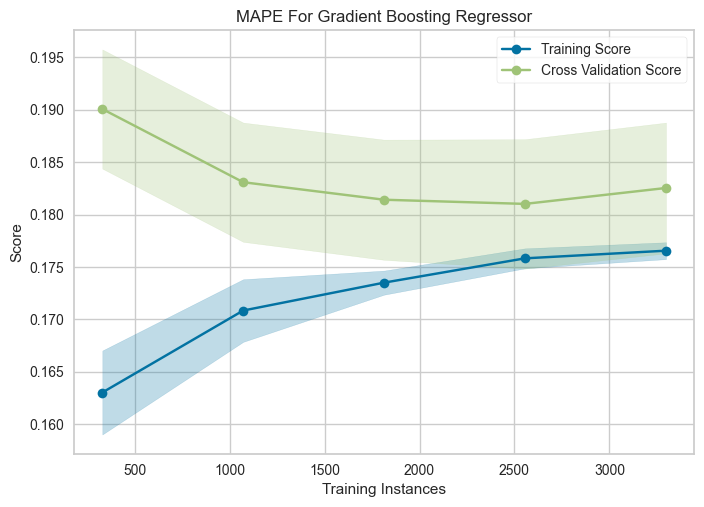

<Axes: title={'center': 'MAPE For Gradient Boosting Regressor'}, xlabel='Training Instances', ylabel='Score'>

In [151]:
from yellowbrick.model_selection import LearningCurve
from sklearn.metrics import mean_absolute_percentage_error, make_scorer

kurva = LearningCurve(finalmodel, scoring=make_scorer(mean_absolute_percentage_error))
kurva.fit(get_config('X'), get_config('y'))
kurva.title = "MAPE For Gradient Boosting Regressor"
kurva.show()

### **7.2. Residual**

Pada grafik dibawah menunjukan Residual Plot untuk model Gradient Boosting Regressor(gbr) sebagai acuan evaluasi performa model regresi dengan menampilkan selisih antar nilai prediksi dan nilai aktual.
* x = Predicted value yang menunjukan nilai yang diprediksi oleh gbr setelah dilakukan training dan dan test.
* y = Residual yang menunjukan selisih antara nilai aktual dan nilai yang diprediksi oleh model
* Warna biru merupakan Train R² yang menunjukan data training.
* Warna hijau merupakan Test R² yang menunjukan data test.
* Histogram di Samping (Distribusi Residuals): Histogram di sisi kanan menunjukkan distribusi residuals. Ini berguna untuk melihat apakah residuals terdistribusi secara normal, yang biasanya diharapkan untuk model regresi yang baik. Idealnya, residuals tersebar simetris di sekitar nol, menunjukkan bahwa model tidak bias.
* Nilai R² (Koefisien Determinasi):
  * Train R²: Nilai ini menunjukkan seberapa baik model menjelaskan variasi dalam data pelatihan. Dalam grafik ini, Train R² = 0.846, yang berarti model dapat menjelaskan sekitar 84.4% variasi dalam data pelatihan.
  * Test R²: Ini menunjukkan seberapa baik model menjelaskan variasi dalam data pengujian. Test R² = 0.841 menunjukkan bahwa model dapat menjelaskan sekitar 84.1% variasi dalam data pengujian.

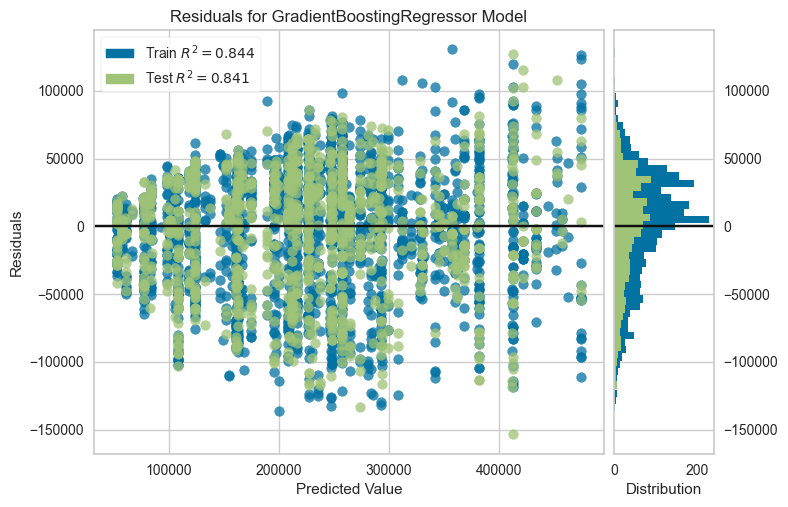

In [152]:
plot_model(finalmodel, plot='residuals')
plt.show()

### **7.3. Error Prediction**

Pada grafik dibawah menunjukan Prediction Error Plot untuk model Gradient Boosting Regressor (gbr) yang digunakan untuk evaluasi model regresi dengan plot nilai titik yang diprediksi oleh model terhadap target.

* x = y atau target sebenarnya atau nilai model yang seharusnya diprediksi dengan benar.
* y = ŷ atau nilai yang diprediksi model / output dari gbr.
* Garis Identitas (Identity Line) garis putus-putus ini menunjukan nilai target dan nilai prediksi (y dan ŷ).
* Scatter Plot menunjukan titik data di mana y adalah nilai target aktual dan ŷ adalah nilai yang diprediksi oleh model.

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,33655.7648,1800947399.5581,42437.5706,0.8412,0.2184,0.1765


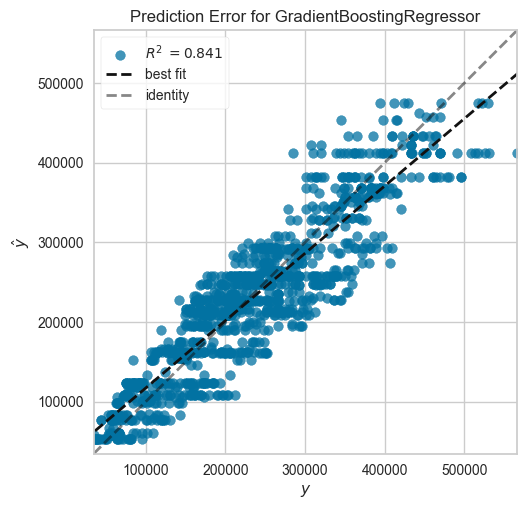

Maximum Value Error Difference From Actual Price = 153666.9857189171
Most Tiny Positive Difference:  42.021762032294646
Most Tiny Negative Difference:  -15.264286801801063
Minimum Value Error Difference From Actual Price = -127271.0142810829
Many Data Overfitting = 557
Many Data Underfitting = 680
Many Data Predicted Correctly Without Any Different = 0


In [153]:
predictions = predict_model(finalmodel, verbose=True)
plot_model(finalmodel, plot='error')
palette = sns.color_palette("husl", 2)

different = predictions['SalePrice'] - predictions['prediction_label']
null_differences = different[different == 0]
positive_differences = different[different > 0]
negative_differences = different[different < 0]
print(f"Maximum Value Error Difference From Actual Price = {different.max()}")
print("Most Tiny Positive Difference: ", positive_differences.min())
print("Most Tiny Negative Difference: ", negative_differences.max())
print(f"Minimum Value Error Difference From Actual Price = {different.min()}")
print(f"Many Data Overfitting = {positive_differences.count()}")
print(f"Many Data Underfitting = {negative_differences.count()}")
print(f"Many Data Predicted Correctly Without Any Different = {null_differences.count()}")

### **7.3. Missed Predict**

Pada grafik ini menunjukan histogram distribusi presentase kesalahan prediksi model pada data validasi untuk mengevaluasi seberapa besar kesalahan terjadi saat model memprediksi nilai berdasarkan rentang yang berbeda.

* x = Range of Errors, menunjukan rentang nilai kesalahan prediksi, rentang nilai yang dberikan mulai dari -200,000 hingga 200,000, dengan interval yang lebih kecil di antaranya, seperti -120,000 hingga -80,000, -40,000 hingga 0, dan seterusnya.
* y = Frekuensi of Errors, menunjukan prediksi dalam rentang tertentu.

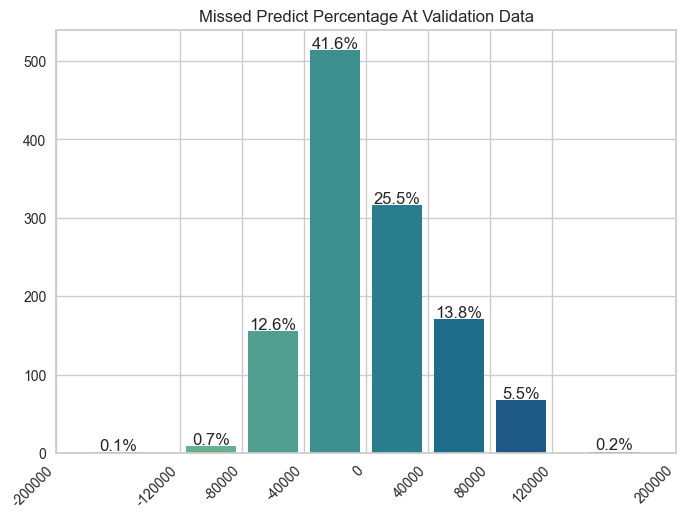

In [154]:
# Define the bins
bins = np.array([-200000, -120000, -80000, -40000, 0, 40000, 80000, 120000, 200000])

# Assuming 'different' is a pandas Series or DataFrame column
counts, bins = np.histogram(different, bins=bins)

# Calculate bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate percentages
total = counts.sum()
percentages = counts / total * 100

# Create a color map
colors = sns.color_palette("crest", len(counts))

# Calculate the smallest difference between all adjacent bins
bin_diffs = np.diff(bins)
min_bin_diff = np.min(bin_diffs)

# Calculate bar width as 80% of the smallest bin difference
bar_width = 0.8 * min_bin_diff

for i in range(len(counts)):
    plt.bar(bin_centers[i], counts[i], width=bar_width, color=colors[i], align='center')

    # Add percentage annotations to the top of the bars
    plt.text(bin_centers[i], counts[i] + 0.002 * total, f'{percentages[i]:.1f}%', fontsize=12, ha='center')

# Set x-ticks to bin edges
plt.xticks(bins)

# Set x-tick labels to bin start values
labels = [f'{bins[i]:.0f}' for i in range(len(bins))]
plt.gca().set_xticklabels(labels, rotation=45, horizontalalignment='right')

plt.title('Missed Predict Percentage At Validation Data')
plt.show()

Dari grafik yang diberikan, dapat dilihat bahwa model prediksi ini memiliki akurasi sebesar 50-59% untuk selisih harga di bawah 40.000 won. Namun, model ini tampaknya cenderung underfitting.

Underfitting adalah kondisi di mana model tidak cukup baik dalam mempelajari struktur data, sehingga menghasilkan performa yang kurang optimal. Dalam konteks ini, model cenderung memprediksi harga yang lebih rendah dari harga sebenarnya.

Hal ini dapat dilihat dari grafik, di mana persentase kesalahan prediksi tertinggi (25-30%) terjadi pada selisih harga 80.000 won. Sementara itu, persentase kesalahan prediksi terendah adalah 0.0% untuk selisih harga tertentu.

### **7.4. Missed Predict**

Sumbu X menampilkan rentang atau kelompok harga jual (Sale Price Bins) yang dibagi menjadi beberapa kategori:
* 0-100k: Rumah dengan harga jual antara 0 hingga 100.000.
* 100k-200k: Rumah dengan harga jual antara 100.000 hingga 200.000.
* 200k-300k: Rumah dengan harga jual antara 200.000 hingga 300.000.
* 300k-400k: Rumah dengan harga jual antara 300.000 hingga 400.000.
* 400k-500k: Rumah dengan harga jual antara 400.000 hingga 500.000.
* 500k-700k: Rumah dengan harga jual antara 500.000 hingga 700.000.

Sumbu Y (Percentage Error (%)):

* Sumbu Y menunjukkan Percentage Error (%), yang merupakan persentase kesalahan prediksi yang dilakukan oleh model dalam masing-masing bin harga jual.
* Persentase kesalahan ini dihitung sebagai kesalahan prediksi relatif terhadap harga jual sebenarnya, biasanya dengan menggunakan Mean Absolute Percentage Error (MAPE) atau metrik serupa.

Grafik ini menunjukkan bahwa kinerja model regresi dalam memprediksi harga jual rumah bervariasi secara signifikan di antara berbagai rentang harga. Model memiliki kesulitan terbesar dalam memprediksi rumah dengan harga jual lebih rendah (0-100k), kemungkinan karena lebih banyak variabilitas dalam karakteristik rumah di kategori harga ini atau data yang lebih heterogen. Model bekerja dengan sangat baik di rentang harga 400k-500k, di mana kesalahan prediksi adalah yang terendah. Di kategori harga yang lebih tinggi, performa model sedikit menurun, tetapi kesalahannya tidak sebesar pada kategori harga terendah.

Untuk meningkatkan akurasi prediksi, terutama di kategori harga yang lebih rendah, bisa dipertimbangkan untuk menambahkan lebih banyak fitur yang relevan, melakukan pra-pemrosesan data yang lebih baik, atau menggunakan model yang lebih kompleks yang dapat menangkap variabilitas di segmen harga yang lebih rendah.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

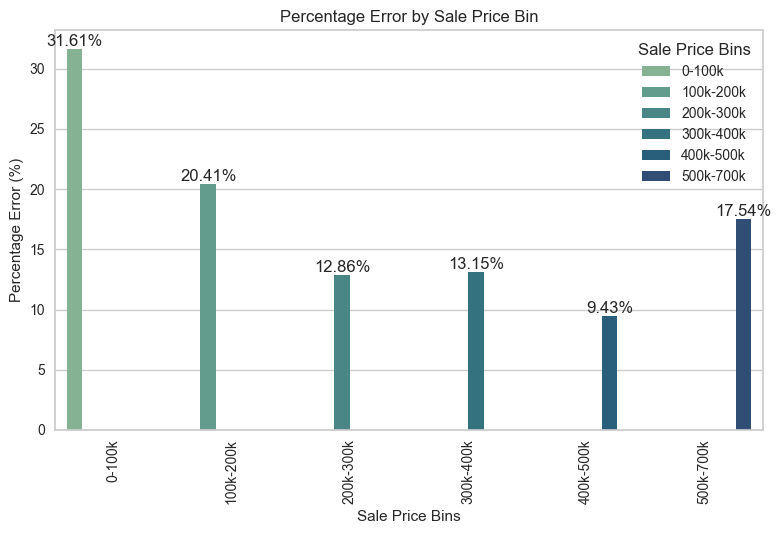

In [155]:
# The rest of your code remains the same
predictions['SalePrice_bins'] = pd.cut(predictions['SalePrice'], bins=[0, 100000, 200000, 300000, 400000, 500000, 700000], labels=["0-100k", "100k-200k", "200k-300k", "300k-400k", "400k-500k", "500k-700k"])

predictions['error'] = predictions['prediction_label'] - predictions['SalePrice']

predictions['abs_error'] = predictions['error'].abs()

predictions['percentage_error'] = predictions['abs_error'] / predictions['SalePrice']

# Set the width of the bars
bar_width = 0.8

mape_bar = sns.barplot(x='SalePrice_bins', y=predictions['percentage_error']*100, data=predictions, hue='SalePrice_bins', palette="crest", ci=None)

# Adjust the labels on each bar
for idx, bar in enumerate(mape_bar.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height()
    label = "{:.2f}%".format(bar.get_height())
    plt.text(x_value, y_value, label, ha='center', va='bottom') 

# Rotate x-axis labels if they are overlapping
plt.xticks(rotation=90)

# Use a more descriptive title and axis labels
plt.title('Percentage Error by Sale Price Bin')
plt.xlabel('Sale Price Bins')
plt.ylabel('Percentage Error (%)')

# Add a legend
plt.legend(title='Sale Price Bins', loc='upper right')

plt.tight_layout()
plt.show()

### **7.4. Ringkasan Kinerja**

**1. Bagaimana Cara Kerja Model Prediksi ini?**

Model prediksi harga apartemen ini menggunakan Gradient Boosting Regressor, sebuah algoritma machine learning yang kuat untuk tugas regresi. Gradient Boosting bekerja dengan membangun serangkaian model yang lebih sederhana (biasanya pohon keputusan), di mana setiap model bertujuan untuk mengurangi kesalahan yang dibuat oleh model sebelumnya. Proses ini disebut boosting dan bertujuan untuk meningkatkan akurasi prediksi secara iteratif. Model ini dilatih menggunakan data historis, yang mencakup berbagai fitur atau karakteristik apartemen seperti luas bangunan, fasilitas dalam bangunan, lokasi terhadap fasilitas publik, dan lain-lain.

Cara Kerja Utama:

* Data Preparation: Data dipersiapkan dengan cara melakukan EDA dan dilakikan analisis serta proses cleaning data, mengubah variabel kategori menjadi numerik, dan menormalkan data.
* Training: Model dilatih menggunakan data training, di mana algoritma Gradient Boosting mencoba meminimalkan kesalahan prediksi (residuals) di setiap iterasi.
* Prediction: Setelah dilatih, model dapat memprediksi harga rumah baru berdasarkan fitur yang diberikan, dengan menggabungkan kontribusi dari semua Decision Tree yang dibangun selama pelatihan.
* Evaluation: Model dievaluasi menggunakan metrik seperti Mean Absolute Percentage Error (MAPE), R-squared (R²), dan lainnya untuk mengukur akurasi prediksi.


**2. Apa Saja Limitasi dari Model Ini?**

model prediksi harga apartemen ini memiliki beberapa limitasi yang perlu diperhatikan:

* Overfitting: Model Gradient Boosting bisa mengalami overfitting, terutama jika terlalu banyak pohon atau terlalu dalam. Overfitting terjadi ketika model terlalu cocok dengan data training dan tidak bekerja dengan baik pada data sebelumnya.
* Sensitivitas terhadap Fitur yang Tidak Relevan: Model ini bisa sensitif terhadap fitur yang tidak relevan atau noise dalam data. Jika fitur yang tidak penting tidak dihapus selama pra-pemrosesan data, ini bisa mempengaruhi performa model.
* Waktu dan Sumber Daya Komputasi: Gradient Boosting adalah metode yang memerlukan waktu dan komputasi yang cukup besar untuk dilatih, terutama dengan dataset yang besar.
* Kompleksitas Model: Model ini bisa menjadi cukup kompleks dan sulit diinterpretasikan, terutama dengan banyaknya decision tree yang digunakan dalam proses boosting. Ini bisa membuat sulit untuk memahami bagaimana model mengambil keputusan berdasarkan fitur input.

**3. Apakah kinerja Model bisa dipercaya?**

Kinerja model tidak ada yang sempurna, relevansi fitur, kualitas data serta konteks lain dimama model akan digunakan akan menambah akurasi, maka dari itu harus diiringi dengan pengetahuan bisnis serta intuisi yang tepat dalam mengambil keputusan, beberapa hal lain yang perlu diperhatikan adalah sebagai berikut:

* Evaluasi dengan Metrik yang Relevan: Model ini dievaluasi menggunakan metrik seperti R² dan MAPE. Nilai R² yang tinggi menunjukkan bahwa model mampu menjelaskan sebagian besar variabilitas dalam data target, sementara nilai MAPE yang rendah menunjukkan bahwa model memiliki kesalahan persentase yang rendah dalam prediksi harga.

* Kinerja pada Data Pengujian: Jika model menunjukkan performa yang konsisten pada data test (data yang tidak digunakan selama train), ini menunjukkan kemampuan generalisasi yang baik.

* Interpretasi dan Konsistensi: Jika model menunjukkan tren yang konsisten dan masuk akal sesuai dengan domain bisnis atau pengetahuan, maka model dapat dianggap lebih dapat dipercaya.

**4. Feature Importance**

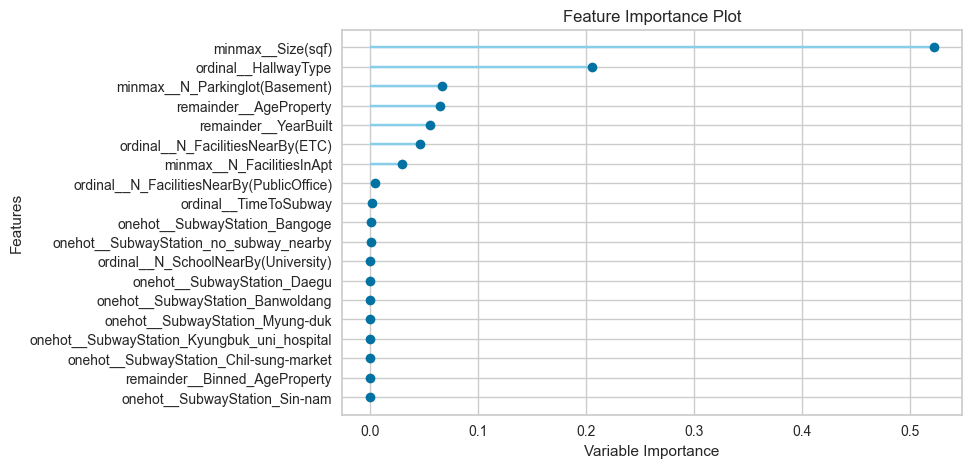

In [156]:
plot_model(finalmodel, plot = 'feature_all')

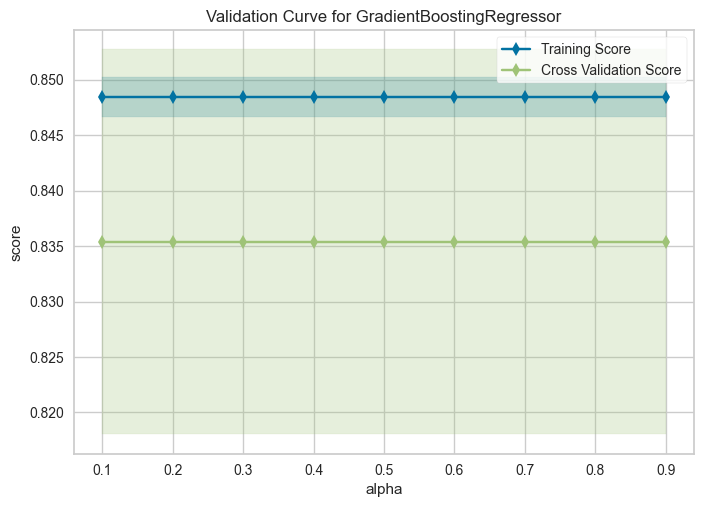

In [157]:
plot_model(finalmodel, plot='vc')

Berdasarkan fiturnya pada sumbu x dan tingkat kepentingan di sumbu y, menunjukan bahwa beberapa fitur sangat mempengaruhi nilai prediksi model, pada grafik diatas contohnya minmax__Size(sqf) menjadi fitur yang paling besar pengaruhnya terhadap prediksi model.
Selain itu terdapat validation curve untuk memvalidasi GradientBoostingRegressor yang menandakan bahwa garis biru adalah skor training yang memiliki nilai yang cukup stabil, sedangkan garis hijau merupakan skor validasi silang yang menunjukan bahwa model memiliki kinerja yang konsisten pada data sebelumnya.

---
## **8. KESIMPULAN**
---

### **CONCLUSIONS**

**1. Kondisi pasar yang dinamis terhadap Harga Jual.**

* Fasilitas apartemen, lokasi terhadap fasilitas umum serta fitur lainnya sangat mempengaruhi, analisis menunjukan bahwa perubahan tersebut dapat mempengaruhi harga jualnya, model prediktif harus selalu dikembangkan menyesuaikan dengan keadaan yang ada agar semakin akurat.

**2. Penentuan Harga.**
    
* Berdasarkan analisis terdapat perbedaan harga antara pusat kota dan wilayah pinggiran kota, model prediktif dirasa kurang sensitif terhadap karakteristik lokasi untuk mengoptimalkan penjualan.

**3. Model Regresi untuk Prediksi harga.**
    
* Untuk GradientBoostingRegressor terbukti cukup efektif untuk menebak harga jual properti, model ini menggunakan berbagai fitur untuk memperikarakan dengan akurasi yang tinggi seperti yang telah dilakukan pada evaluasi.

### **RECOMMENDATION**

**1. Model Prediktif digunakan secara kontinyu**

* Model prediktif perlu dilakukan pengembangan secara berkelanjutan terhadap kondisi situasi terkini.

**2. Penyesuaian Strategi dengan Analisis Data**

* Manfaatkan wawasan dari model untuk menyesuaikan strategi penjualan dan pemasaran, terutama dalam menanggapi perubahan tren harga di berbagai lokasi.
* Analisis dampak perubahan infrastruktur dan demografi pada harga real estat dapat menjadi dasar untuk mengambil keputusan investasi dan pengembangan yang lebih terinformasi.

### **DEPLOYMENT**

In [158]:
save_model(finalmodel, 'wb')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('custom_step',
                  TransformerWrapper(transformer=Pipeline(steps=[('Outlier',
                                                                  TransformerWrapper(include=['Size(sqf)'],
                                                                                     transformer=HandleOutlier())),
                                                                 ('Age',
                                                                  TransformerWrapper(include=['YearBuilt'],
                                                                                     transformer=AgeTransformer())),
                                                                 ('Binnning',
                                                                  TransformerWrapper(include=['AgeProperty'],
                                                                                     transformer=AgeBinner())),
                            